In [30]:
import pandas as pd
from helper import get_my_dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Data Understanding

## Initial Data exploration

### Instances and attributes

In [31]:
"""
Get the data_set filtered for my borough
"""
main_df = get_my_dataset()

In [32]:
"""
Checking the rows and columns of the dataset
"""
main_df.shape

(2070, 32)

### Data types

In [33]:
main_df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_District                         int64
Local_Authority_Highway                         object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

## Data quality issues

### Missing values

Missing Values Per Column:
Accident_Index                                   0
Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                             0
Local_Authority_District                         0
Local_Authority_Highway                          0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Detail                                  0
Junc

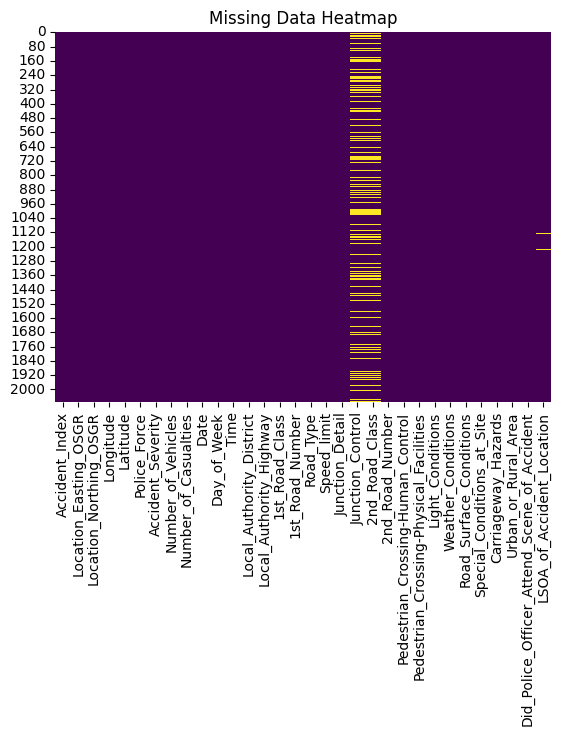

In [34]:
""" 
Checking missing values
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of missing value indicators (e.g., -1)
missing_indicators = [-1, "-1", ""]

# Check for missing values using `isnull()` and placeholders
missing_values = main_df.isnull().sum()
for col in main_df.columns:
    missing_values[col] += (main_df[col].isin(missing_indicators)).sum()

print("Missing Values Per Column:")
print(missing_values)

# Visualize missing data using a heatmap
sns.heatmap(main_df.isin(missing_indicators) | main_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

### Outliers

Visualize to see distribution

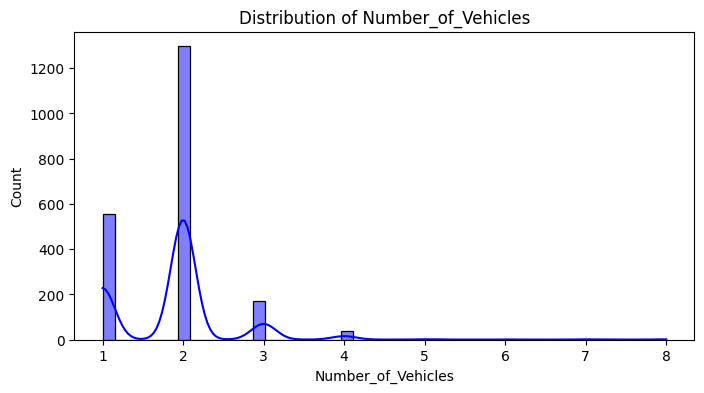

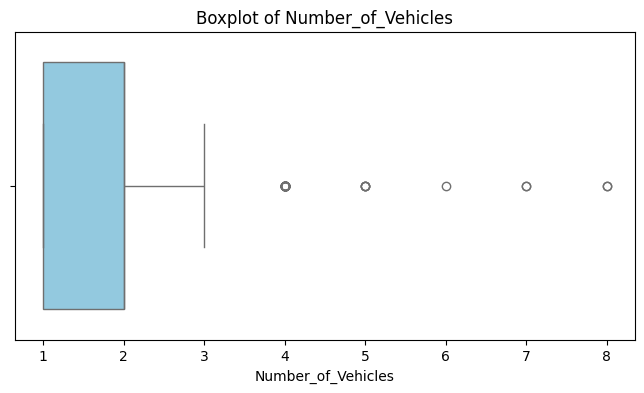

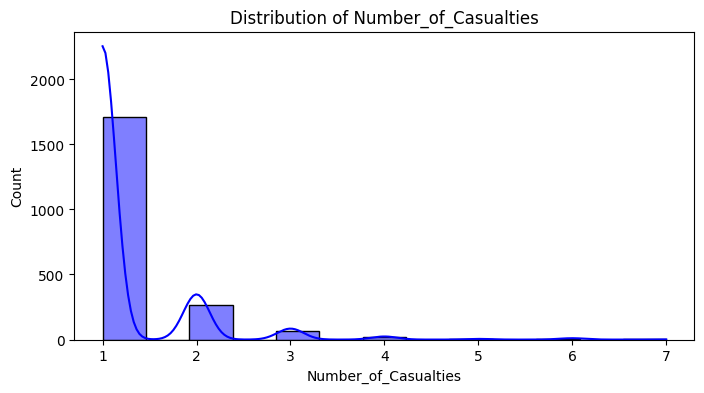

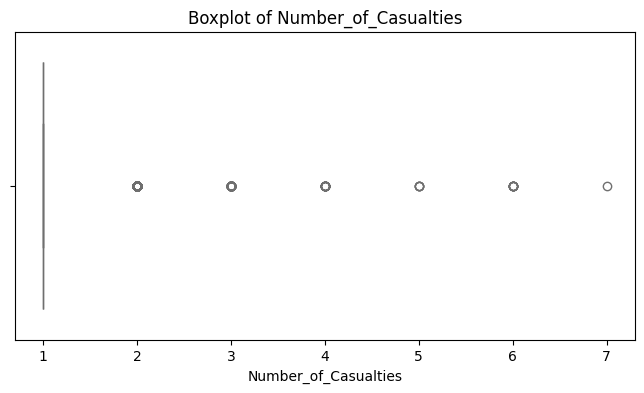

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = [
    'Number_of_Vehicles', 'Number_of_Casualties'
]

# Plot histograms and boxplots
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(main_df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(main_df[column], orient='h', color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.show()


Detect Outliers

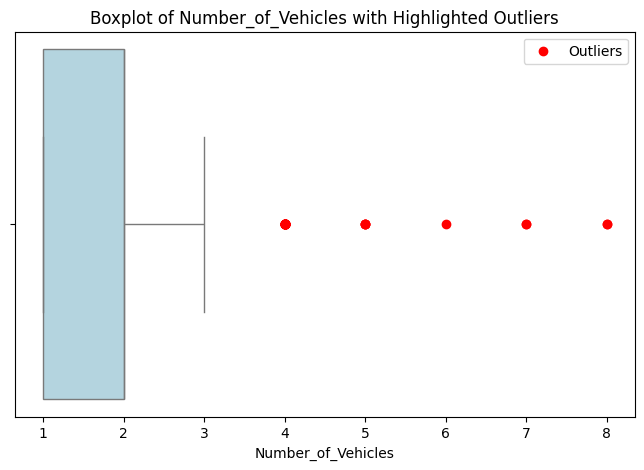

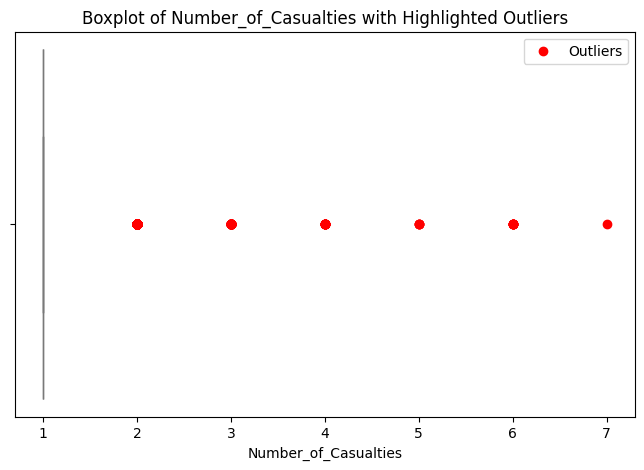

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot each numerical column with its outliers
for column in numerical_columns:
    Q1 = main_df[column].quantile(0.25)
    Q3 = main_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = main_df[(main_df[column] < lower_bound) | (main_df[column] > upper_bound)]

    # Boxplot with highlighted outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=main_df[column], color='lightblue', showfliers=False)  # Remove default outliers
    plt.scatter(outliers[column], [0] * len(outliers), color='red', label='Outliers')  # Highlight outliers
    plt.title(f'Boxplot of {column} with Highlighted Outliers')
    plt.xlabel(column)
    plt.legend()
    plt.show()


### Extreme values

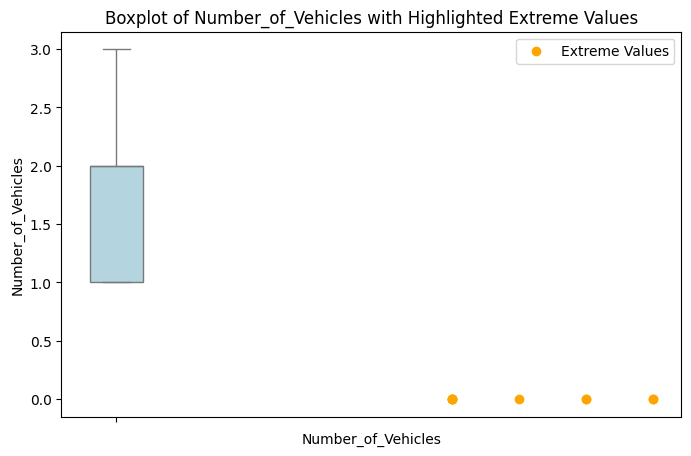

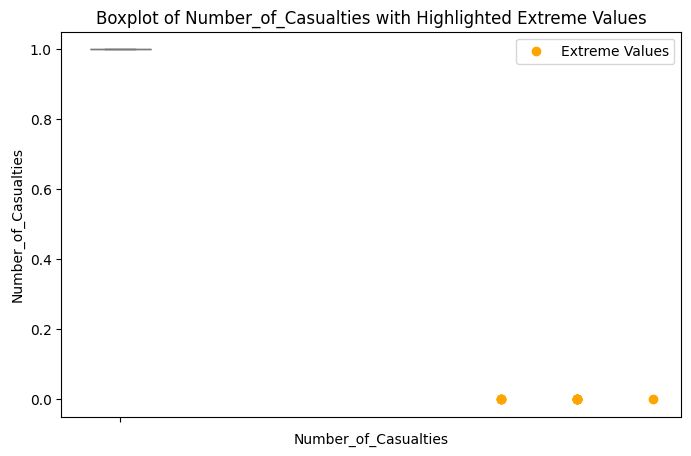

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot boxplots with extreme values highlighted
def plot_extreme_values(df, numerical_columns):
    for column in numerical_columns:
        # Calculate extreme value thresholds (1st and 99th percentiles)
        low_percentile = df[column].quantile(0.01)
        high_percentile = df[column].quantile(0.99)
        
        # Identify extreme values
        extreme_values = df[(df[column] < low_percentile) | (df[column] > high_percentile)]
        
        # Create a boxplot
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df[column], color='lightblue', showfliers=False)  # Boxplot without default outliers
        plt.scatter(extreme_values[column], [0] * len(extreme_values), color='orange', label='Extreme Values')  # Highlight extreme values
        plt.title(f'Boxplot of {column} with Highlighted Extreme Values')
        plt.xlabel(column)
        plt.legend()
        plt.show()

# Specify the numerical columns to plot
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties']

# Call the function
plot_extreme_values(main_df, numerical_columns)


### Incomparable value ranges

Value Ranges for Numerical Columns:
Number_of_Vehicles: Min = 1, Max = 8, Range = 7
Number_of_Casualties: Min = 1, Max = 7, Range = 6


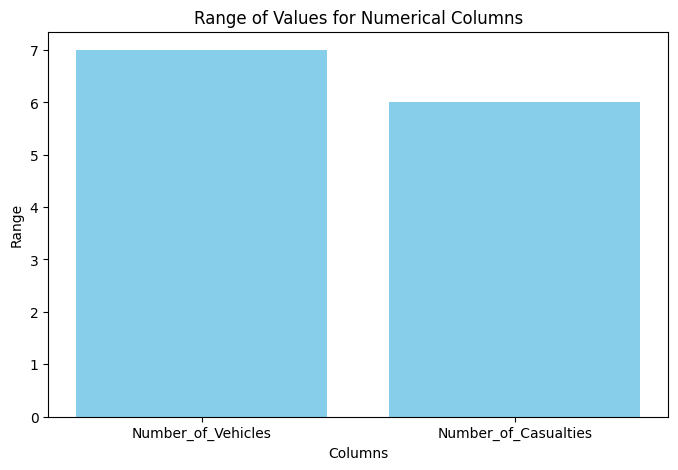

In [38]:
# Define the numerical columns (excluding Speed_limit)
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties']

# Print the min, max, and range for each numerical column
print("Value Ranges for Numerical Columns:")
for column in numerical_columns:
    min_val = main_df[column].min()
    max_val = main_df[column].max()
    range_val = max_val - min_val
    print(f"{column}: Min = {min_val}, Max = {max_val}, Range = {range_val}")

import matplotlib.pyplot as plt

# Calculate ranges for numerical columns
ranges = {column: main_df[column].max() - main_df[column].min() for column in numerical_columns}

# Plot the ranges
plt.figure(figsize=(8, 5))
plt.bar(ranges.keys(), ranges.values(), color='skyblue')
plt.title('Range of Values for Numerical Columns')
plt.ylabel('Range')
plt.xlabel('Columns')
plt.show()



### Imbalanced classes

In [39]:
# List of categorical columns
categorical_columns = [
    "Police_Force",
    "Accident_Severity",
    "Number_of_Vehicles",
    "Number_of_Casualties",
    "Day_of_Week",
    "Local_Authority_District",
    "Local_Authority_Highway",
    "1st_Road_Class",
    "1st_Road_Number",
    "Road_Type",
    "Speed_limit",
    "Junction_Detail",
    "Junction_Control",
    "2nd_Road_Class",
    "2nd_Road_Number",
    "Pedestrian_Crossing-Human_Control",
    "Pedestrian_Crossing-Physical_Facilities",
    "Light_Conditions",
    "Weather_Conditions",
    "Road_Surface_Conditions",
    "Special_Conditions_at_Site",
    "Carriageway_Hazards",
    "Urban_or_Rural_Area",
    "Did_Police_Officer_Attend_Scene_of_Accident",
]


# Check class distributions
print("Class Distributions for Categorical Columns:")
for column in categorical_columns:
    print(f"\n{column} Distribution:")
    print(main_df[column].value_counts())


Class Distributions for Categorical Columns:

Police_Force Distribution:
Police_Force
1    2070
Name: count, dtype: int64

Accident_Severity Distribution:
Accident_Severity
3    1745
2     310
1      15
Name: count, dtype: int64

Number_of_Vehicles Distribution:
Number_of_Vehicles
2    1297
1     557
3     170
4      37
5       4
7       2
8       2
6       1
Name: count, dtype: int64

Number_of_Casualties Distribution:
Number_of_Casualties
1    1711
2     264
3      64
4      18
6       8
5       4
7       1
Name: count, dtype: int64

Day_of_Week Distribution:
Day_of_Week
6    336
4    335
5    327
2    318
3    310
7    252
1    192
Name: count, dtype: int64

Local_Authority_District Distribution:
Local_Authority_District
23    2070
Name: count, dtype: int64

Local_Authority_Highway Distribution:
Local_Authority_Highway
E09000021    2070
Name: count, dtype: int64

1st_Road_Class Distribution:
1st_Road_Class
3    1388
6     301
5     235
4     146
Name: count, dtype: int64

1st_Road_N

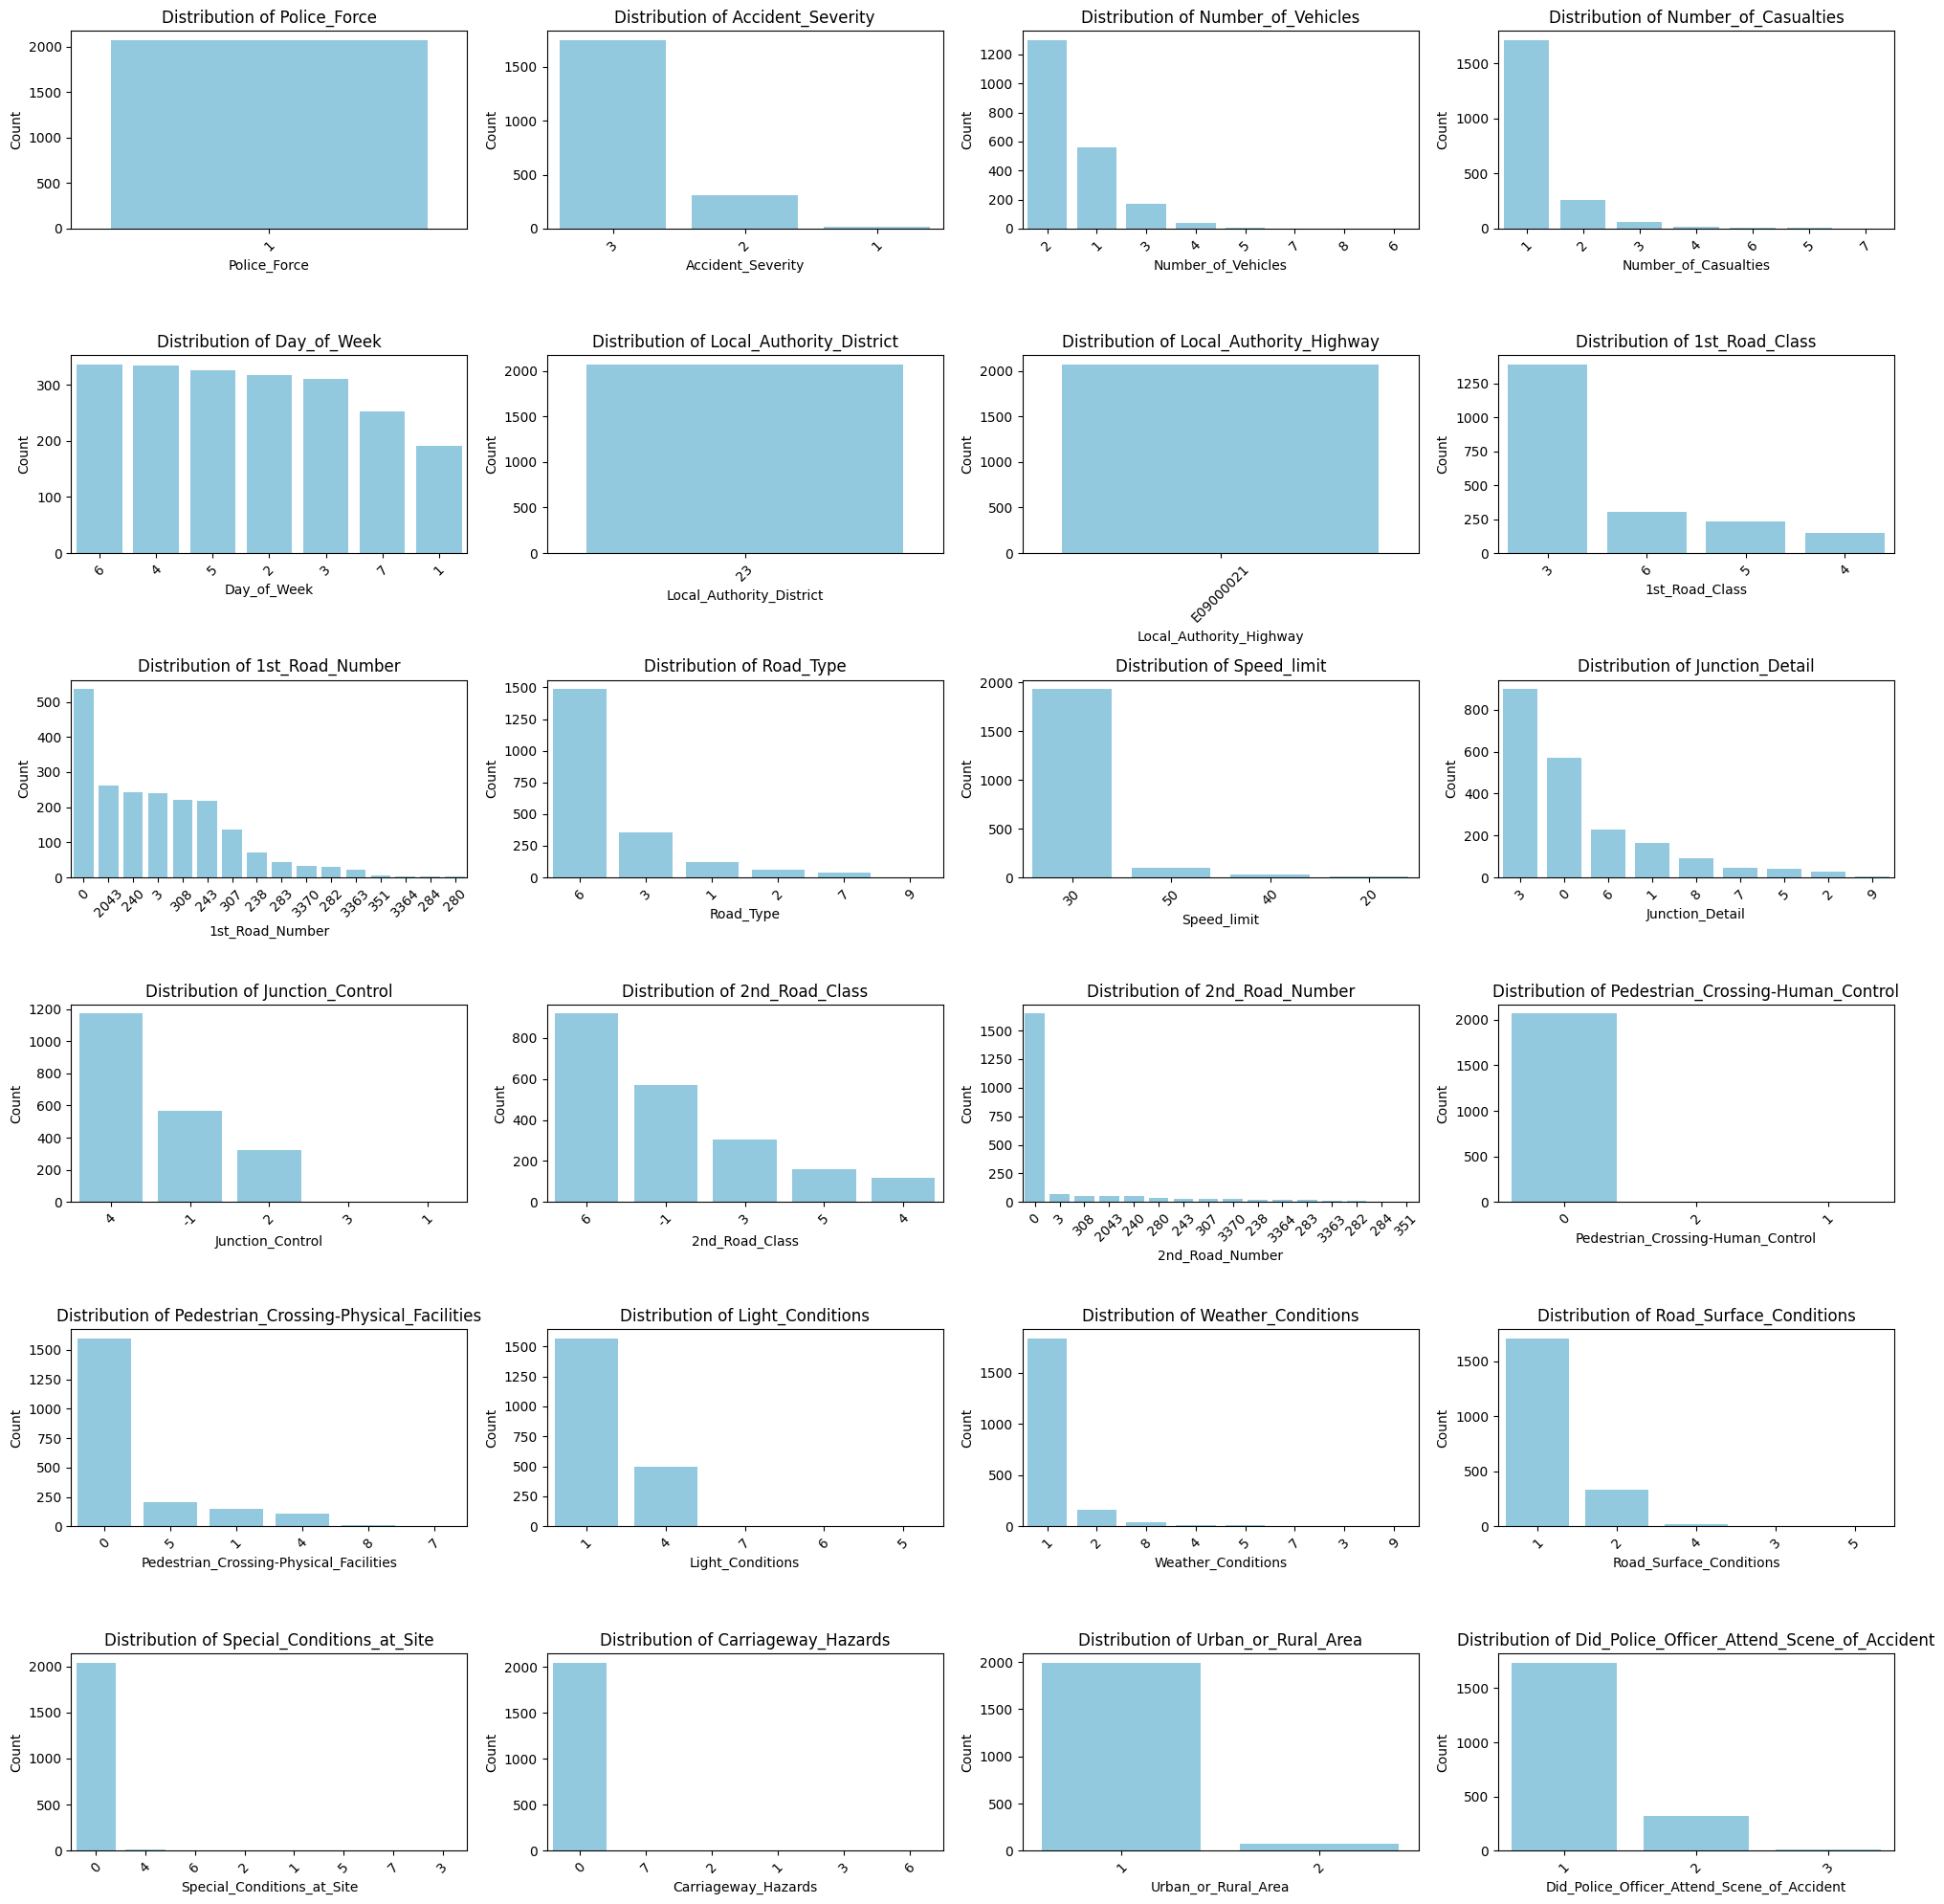

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(
        data=main_df,
        x=column,
        order=main_df[column].value_counts().index,
        color='skyblue',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Mapped version

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the field metadata Excel file (all sheets as a dictionary of DataFrames)
field_metadata = pd.read_excel("field_metadata.xls", sheet_name=None)

# Function to map encoded values to labels
def replace_codes_with_labels(data, metadata_dict, categorical_columns):
    for column in categorical_columns:
        if column in metadata_dict:  # Check if column has a corresponding sheet
            mapping_df = metadata_dict[column]  # Sheet data for current column
            code_to_label = dict(zip(mapping_df['code'], mapping_df['label']))
            data[column] = data[column].replace(code_to_label)  # Replace values
    return data

# Replace codes with labels
mapped_df = replace_codes_with_labels(main_df, field_metadata, categorical_columns)

# Plot updated distributions
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(
        data=mapped_df,
        x=column,
        order=mapped_df[column].value_counts().index,
        color='skyblue',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Traceback (most recent call last):
  File "c:\Users\USER\CodeSpace\school\data_mining\accidents\.venv\lib\site-packages\debugpy\_vendored\pydevd\_pydevd_bundle\pydevd_vars.py", line 622, in change_attr_expression
    value = eval(expression, frame.f_globals, frame.f_locals)
  File "<string>", line 1
    {'Introduction':                                            Data Guide0                      Road Acc...gitude and Latitude data is based on WG..., 'Export Variables':                                             VARIABLES  \0                           ...                                     NaN  , 'Police Force':     code                  label0      1    Metropolitan Police1      3             ...trathclyde50    98  Dumfries and Galloway, 'Accident Severity':    code    label0     1    Fatal1     2  Serious2     3   Slight, 'Day of Week':    code      label0     1     Sunday1     2     Monday2     3    Tuesday3     4  ...sday5     6     Friday6     7   Saturday, 'Local Authority (Distr

### Correct data types

In [42]:
# Convert date and time columns to datetime
main_df['Date'] = pd.to_datetime(main_df['Date'], format='%d/%m/%Y', errors='coerce')
main_df['Time'] = pd.to_datetime(main_df['Time'], format='%H:%M', errors='coerce')
# Lists of columns to convert to specific data types
category_columns = [
    'Police_Force', 'Accident_Severity', 'Day_of_Week', 'Speed_limit', 'Weather_Conditions',
    'Road_Type', 'Light_Conditions', 'Urban_or_Rural_Area', '1st_Road_Class', '1st_Road_Number',
    '2nd_Road_Class', '2nd_Road_Number', 'Local_Authority_Highway', 'Junction_Detail',
    'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
    'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident', 'Local_Authority_District'
]

int_columns = ['Number_of_Vehicles', 'Number_of_Casualties']

# Convert columns to 'category' dtype
for col in category_columns:
    main_df[col] = main_df[col].astype('category')

# Convert columns to 'int' dtype
for col in int_columns:
    main_df[col] = main_df[col].astype(int)

main_df.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                         category
Accident_Severity                                    category
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                          category
Time                                           datetime64[ns]
Local_Authority_District                             category
Local_Authority_Highway                              category
1st_Road_Class                                       category
1st_Road_Number                                      category
Road_Typ

### Basic statistics of each attribute

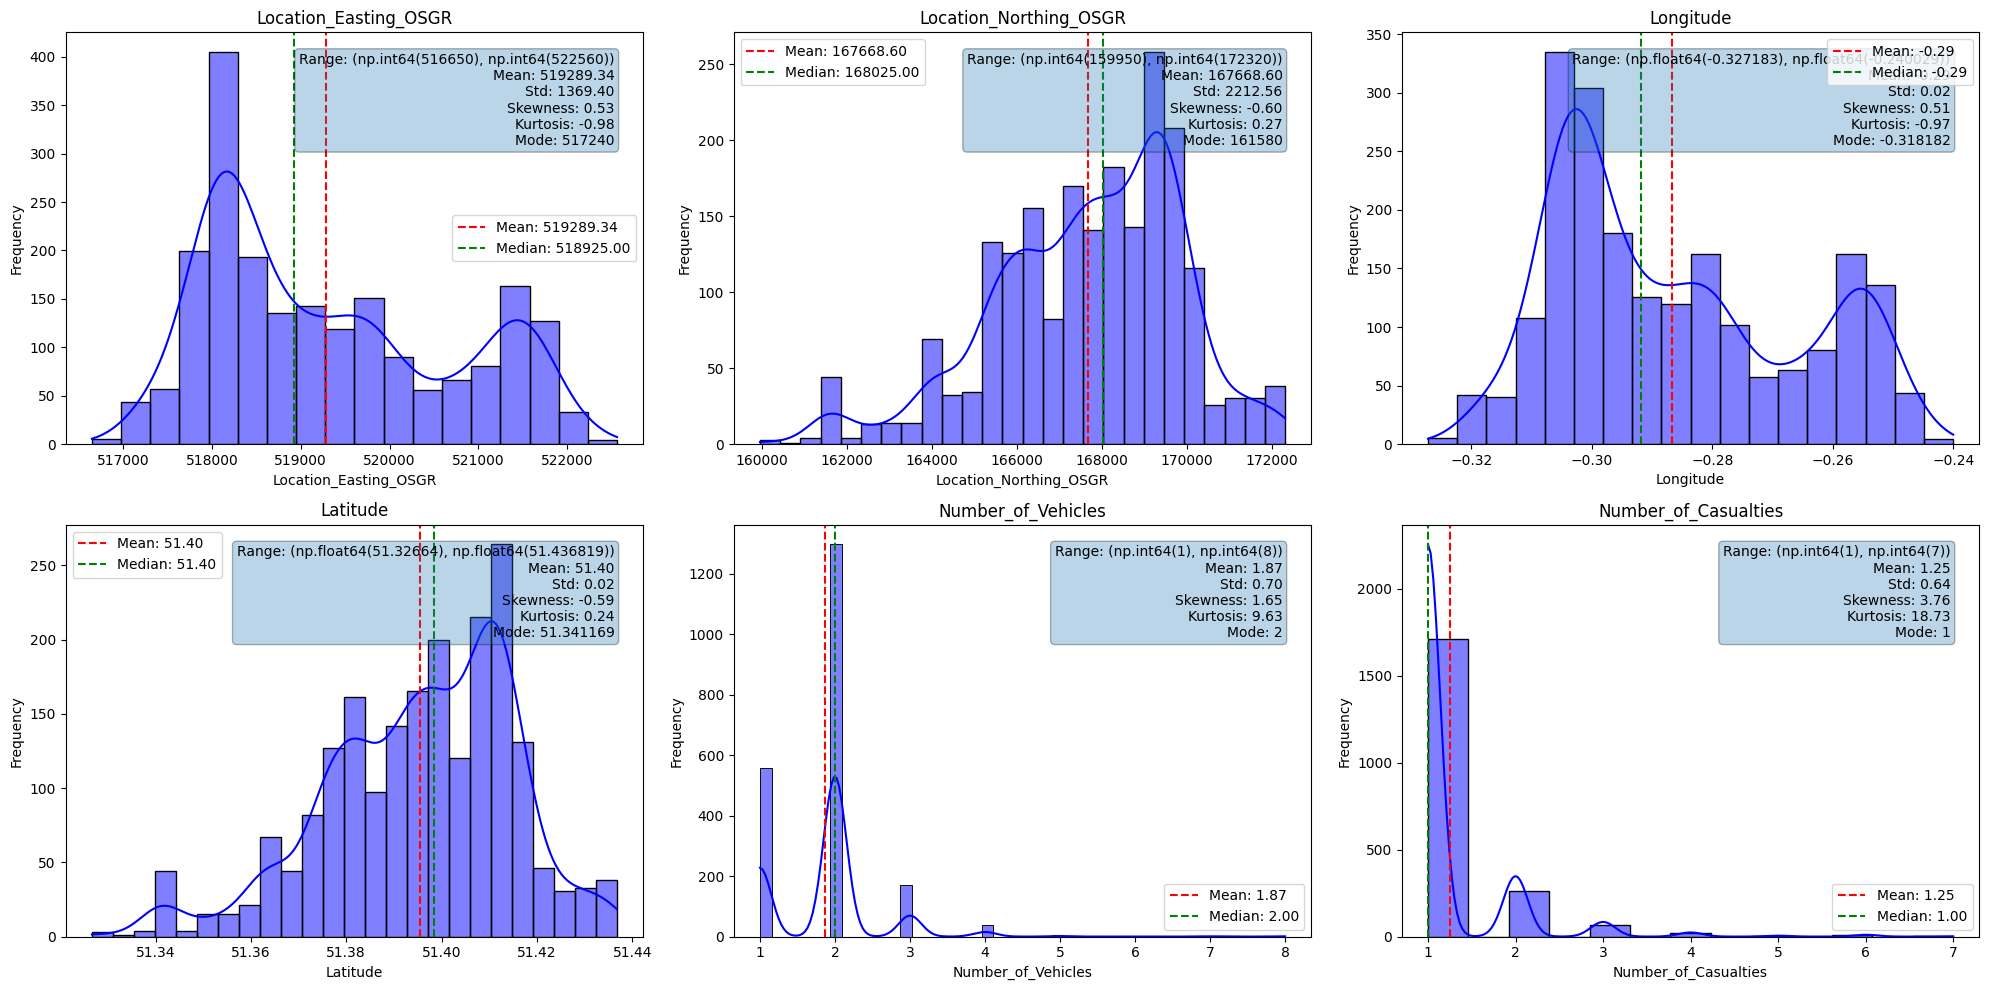

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import skew, kurtosis

# Define columns
numerical_columns = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 
                     'Longitude', 'Latitude', 
                     'Number_of_Vehicles', 'Number_of_Casualties']

categorical_columns = [
        'Police_Force', 'Accident_Severity', 'Day_of_Week', 'Speed_limit', 'Weather_Conditions',
    'Road_Type', 'Light_Conditions', 'Urban_or_Rural_Area', '1st_Road_Class', '1st_Road_Number',
    '2nd_Road_Class', '2nd_Road_Number', 'Local_Authority_Highway', 'Junction_Detail',
    'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
    'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident', 'Local_Authority_District','LSOA_of_Accident_Location'
                       ]

# all_columns = numerical_columns + categorical_columns
all_columns = numerical_columns

# Determine grid size for subplots
num_cols = 3  # Number of columns in the grid
num_rows = math.ceil(len(all_columns) / num_cols)

# Create figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Plot each attribute
for i, column in enumerate(all_columns):
    if column in numerical_columns:
        # Numerical column: Histogram with all statistics annotated
        data = main_df[column]
        mean = data.mean()
        median = data.median()
        std = data.std()
        skewness = skew(data, nan_policy='omit')
        kurt = kurtosis(data, nan_policy='omit')
        mode = data.mode()[0]
        value_range = (data.min(), data.max())

        sns.histplot(data=data, kde=True, ax=axes[i], color='blue')
        axes[i].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
        axes[i].axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        # Annotate statistics
        stats_text = (f"Range: {value_range}\nMean: {mean:.2f}\nStd: {std:.2f}\n"
                      f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}\nMode: {mode}")
        axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes, fontsize=10,
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(boxstyle="round", alpha=0.3))
        axes[i].legend()

    elif column in categorical_columns:
        # Categorical column: Bar plot with counts annotated
        sns.countplot(data=main_df, x=column, ax=axes[i], color='skyblue', 
                      order=main_df[column].value_counts().index)
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')

        # Add counts above bars
        for p in axes[i].patches:
            axes[i].annotate(f'{int(p.get_height())}', 
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                             textcoords='offset points')
        axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(all_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save the figure
plt.tight_layout()
plt.show()


## Data preparation

### Pre processing

Missing values

Updated Missing Values Per Column:
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_District                       0
Local_Authority_Highway                        0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                  

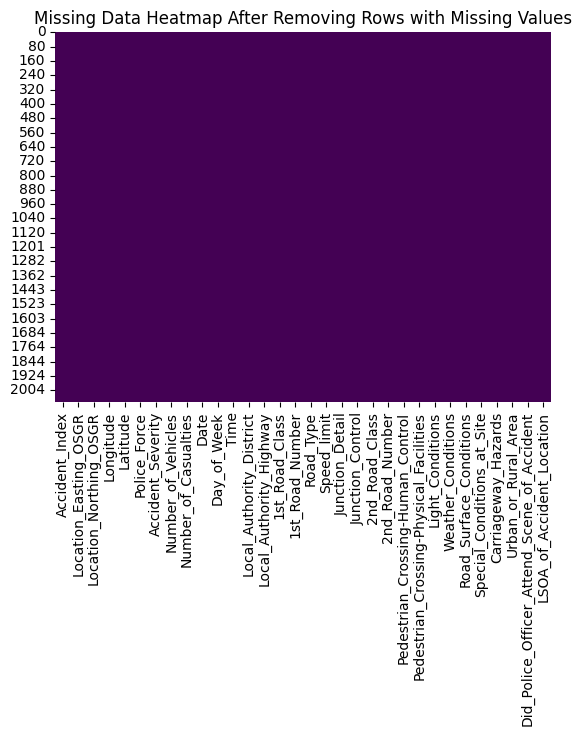

In [44]:
# Remove rows with missing values
main_df.dropna(inplace=True)

# Verify no missing values remain
updated_missing_values = main_df.isnull().sum()
print("Updated Missing Values Per Column:")
print(updated_missing_values)

# Visualize remaining missing data to ensure no missing values
sns.heatmap(main_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap After Removing Rows with Missing Values")
plt.show()


Imbalanced classes

In [45]:
imbalanced_classes = {}

for column in categorical_columns:
    class_counts = main_df[column].value_counts(normalize=True) * 100
    if class_counts.max() > 90:  # Threshold for imbalance (e.g., one class >90%)
        imbalanced_classes[column] = class_counts

from imblearn.over_sampling import RandomOverSampler

# Oversample the target variable
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(main_df.drop('Accident_Severity', axis=1),
                                                     main_df['Accident_Severity'])

# Combine resampled data
balanced_df = X_resampled.copy()
balanced_df['Accident_Severity'] = y_resampled

print(balanced_df['Accident_Severity'].value_counts())

Accident_Severity
1    1741
2    1741
3    1741
Name: count, dtype: int64


Outliers

Shape after outlier removal: (1687, 32)


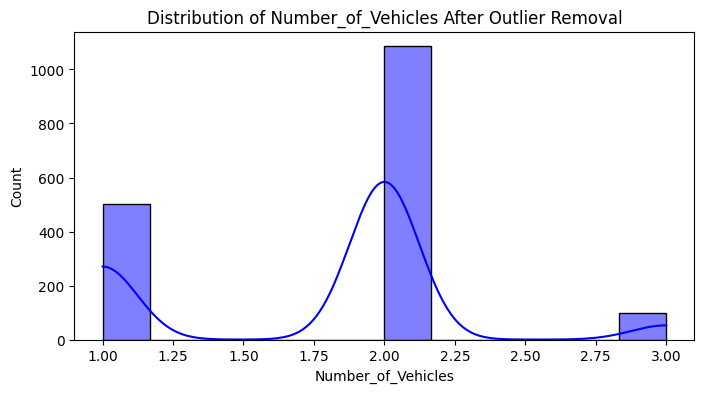

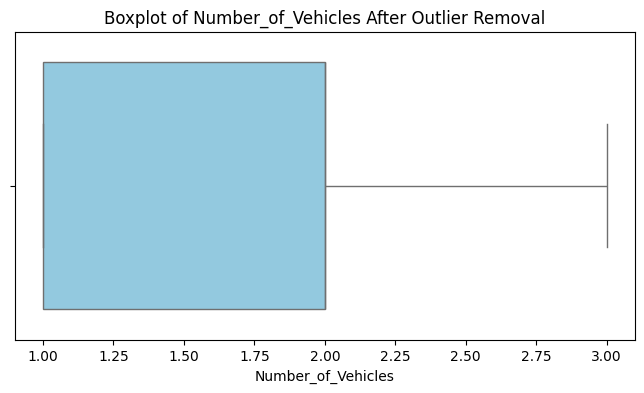

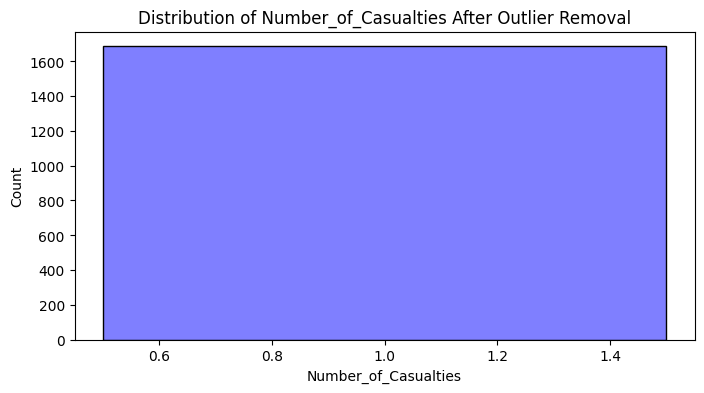

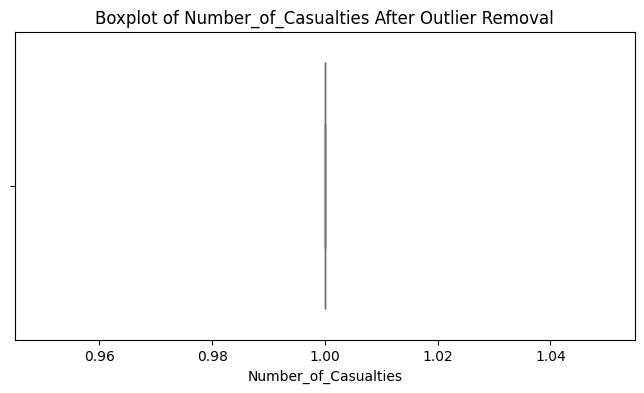

In [46]:
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties']

for column in numerical_columns:
    # Calculate the Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = main_df[column].quantile(0.25)
    Q3 = main_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows where the value is outside the bounds
    main_df = main_df[(main_df[column] >= lower_bound) & (main_df[column] <= upper_bound)]

# Display the new shape of the dataset after outlier removal
print("Shape after outlier removal:", main_df.shape)

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns

# Re-visualize histograms and boxplots after removing outliers
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(main_df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column} After Outlier Removal')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(main_df[column], orient='h', color='skyblue')
    plt.title(f'Boxplot of {column} After Outlier Removal')
    plt.show()



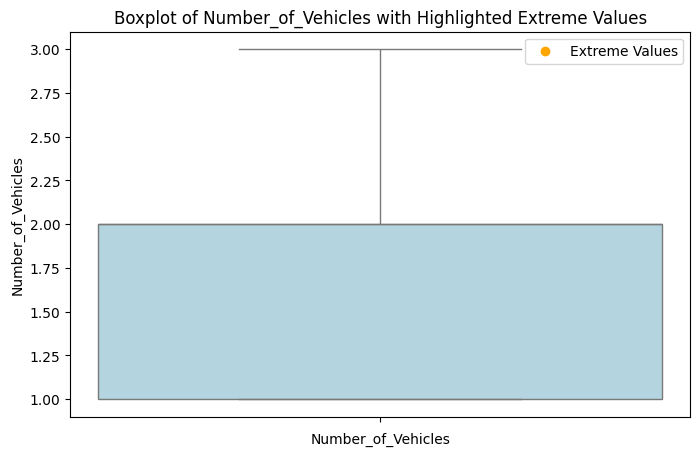

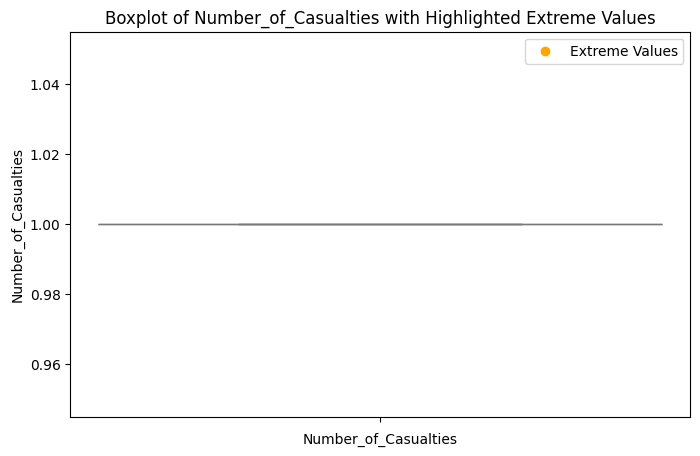

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot boxplots with extreme values highlighted
def plot_extreme_values(df, numerical_columns):
    for column in numerical_columns:
        # Calculate extreme value thresholds (1st and 99th percentiles)
        low_percentile = df[column].quantile(0.01)
        high_percentile = df[column].quantile(0.99)
        
        # Identify extreme values
        extreme_values = df[(df[column] < low_percentile) | (df[column] > high_percentile)]
        
        # Create a boxplot
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df[column], color='lightblue', showfliers=False)  # Boxplot without default outliers
        plt.scatter(extreme_values[column], [0] * len(extreme_values), color='orange', label='Extreme Values')  # Highlight extreme values
        plt.title(f'Boxplot of {column} with Highlighted Extreme Values')
        plt.xlabel(column)
        plt.legend()
        plt.show()

# Specify the numerical columns to plot
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties']

# Call the function
plot_extreme_values(main_df, numerical_columns)


Determine why,why and how each attribute should and should not be used

In [48]:
# List of selected attributes
selected_attributes = [
    "Number_of_Casualties",
    "Number_of_Vehicles",
    "Road_Type",
    "Speed_limit",
    "Light_Conditions",
    "Latitude",
    "Longitude",
    "Accident_Severity",
    "Weather_Conditions",
    "Road_Surface_Conditions"
]

# Filter the main_df to keep only the selected attributes
filtered_df = main_df[selected_attributes]

# Display the first few rows of the filtered dataframe to verify
print(filtered_df.head())

   Number_of_Casualties  Number_of_Vehicles Road_Type Speed_limit  \
0                     1                   1         6          50   
1                     1                   3         3          50   
3                     1                   3         3          50   
4                     1                   2         3          30   
5                     1                   1         6          30   

  Light_Conditions   Latitude  Longitude Accident_Severity Weather_Conditions  \
0                4  51.414457  -0.250492                 3                  1   
1                1  51.375047  -0.304009                 3                  1   
3                4  51.390837  -0.264617                 3                  1   
4                4  51.434962  -0.256614                 2                  1   
5                1  51.390069  -0.298136                 2                  1   

  Road_Surface_Conditions  
0                       2  
1                       2  
3             

Divide dataset (Training, Test & Validation)

In [49]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = filtered_df.drop(columns=["Accident_Severity"])  # Features
y = filtered_df["Accident_Severity"]  # Target variable

# Split the data into training and test sets (80% training, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the remaining 20% into validation and test sets (10% validation, 10% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the shapes of the datasets
print("Training Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)


Training Set: (1349, 9) (1349,)
Validation Set: (169, 9) (169,)
Test Set: (169, 9) (169,)


1 hot encoding

In [50]:
import pandas as pd

# Columns to encode
categorical_columns_to_encode = [
    "Road_Type",
    "Speed_limit",
    "Light_Conditions",
    "Accident_Severity",
    "Weather_Conditions",
    "Road_Surface_Conditions"
]

# Perform one-hot encoding on the selected columns
final_df = pd.get_dummies(filtered_df, columns=categorical_columns_to_encode, drop_first=True)

# Display the first few rows
print("Dataset After One-Hot Encoding:")
# print(final_df.head())
print(final_df.columns.tolist)

# Verify the shape of the transformed dataset
print("Shape after encoding:", final_df.shape)


Dataset After One-Hot Encoding:
<bound method IndexOpsMixin.tolist of Index(['Number_of_Casualties', 'Number_of_Vehicles', 'Latitude', 'Longitude',
       'Road_Type_2', 'Road_Type_3', 'Road_Type_6', 'Road_Type_7',
       'Road_Type_9', 'Speed_limit_30', 'Speed_limit_40', 'Speed_limit_50',
       'Light_Conditions_4', 'Light_Conditions_5', 'Light_Conditions_6',
       'Light_Conditions_7', 'Accident_Severity_2', 'Accident_Severity_3',
       'Weather_Conditions_2', 'Weather_Conditions_3', 'Weather_Conditions_4',
       'Weather_Conditions_5', 'Weather_Conditions_7', 'Weather_Conditions_8',
       'Weather_Conditions_9', 'Road_Surface_Conditions_2',
       'Road_Surface_Conditions_3', 'Road_Surface_Conditions_4',
       'Road_Surface_Conditions_5'],
      dtype='object')>
Shape after encoding: (1687, 29)


## Modeling

### Task 1 - Descriptive

Correlation

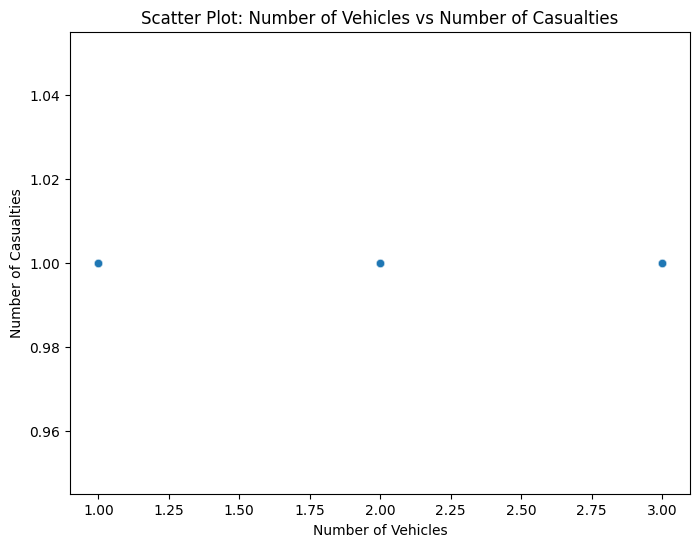

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_df, x="Number_of_Vehicles", y="Number_of_Casualties", alpha=0.6)
plt.title("Scatter Plot: Number of Vehicles vs Number of Casualties")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.show()


In [52]:
# Get the updated column names after one-hot encoding
all_columns = final_df.columns

# Dynamically identify encoded columns
encoded_road_type = [col for col in all_columns if 'Road_Type' in col]
encoded_speed_limit = [col for col in all_columns if 'Speed_limit' in col]
encoded_light_conditions = [col for col in all_columns if 'Light_Conditions' in col]

# Print detected encoded columns
print("Encoded Road_Type Columns:", encoded_road_type)
print("Encoded Speed_Limit Columns:", encoded_speed_limit)
print("Encoded Light_Conditions Columns:", encoded_light_conditions)


Encoded Road_Type Columns: ['Road_Type_2', 'Road_Type_3', 'Road_Type_6', 'Road_Type_7', 'Road_Type_9']
Encoded Speed_Limit Columns: ['Speed_limit_30', 'Speed_limit_40', 'Speed_limit_50']
Encoded Light_Conditions Columns: ['Light_Conditions_4', 'Light_Conditions_5', 'Light_Conditions_6', 'Light_Conditions_7']


Correlation matrix

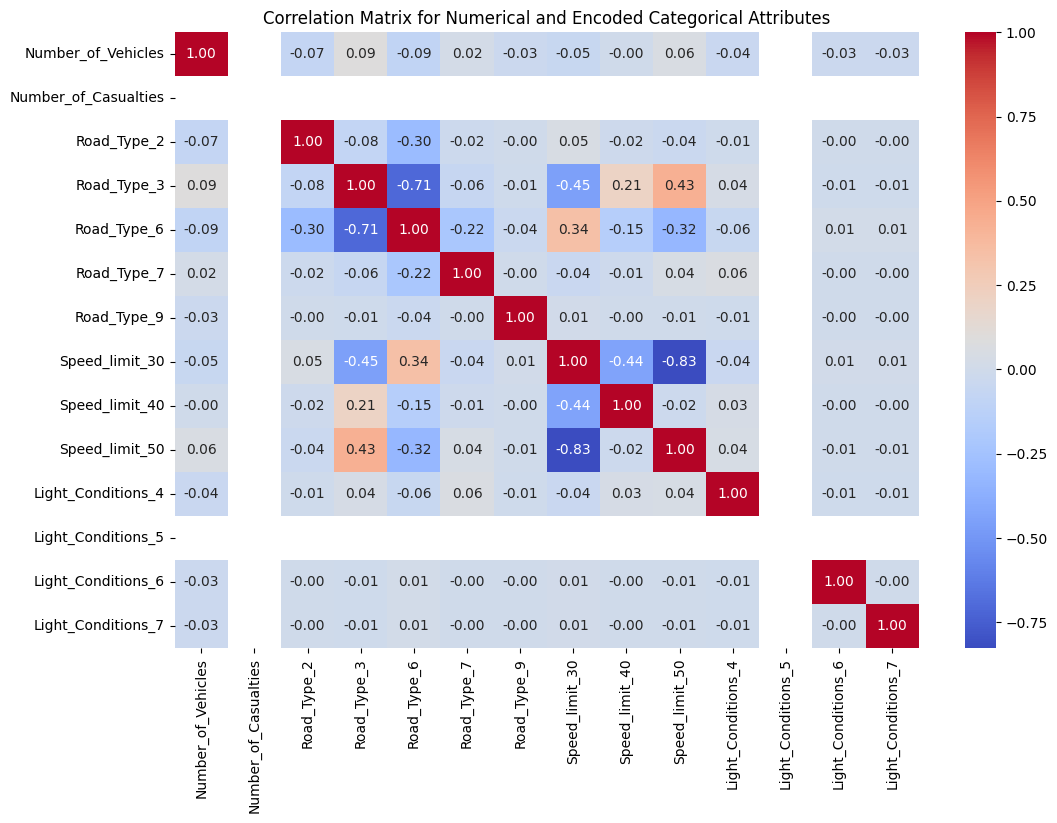

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns dynamically
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties']
encoded_columns = encoded_road_type + encoded_speed_limit + encoded_light_conditions
relevant_columns = numerical_columns + encoded_columns

# Compute correlation matrix
correlation_matrix = final_df[relevant_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical and Encoded Categorical Attributes")
plt.show()


Heatmap

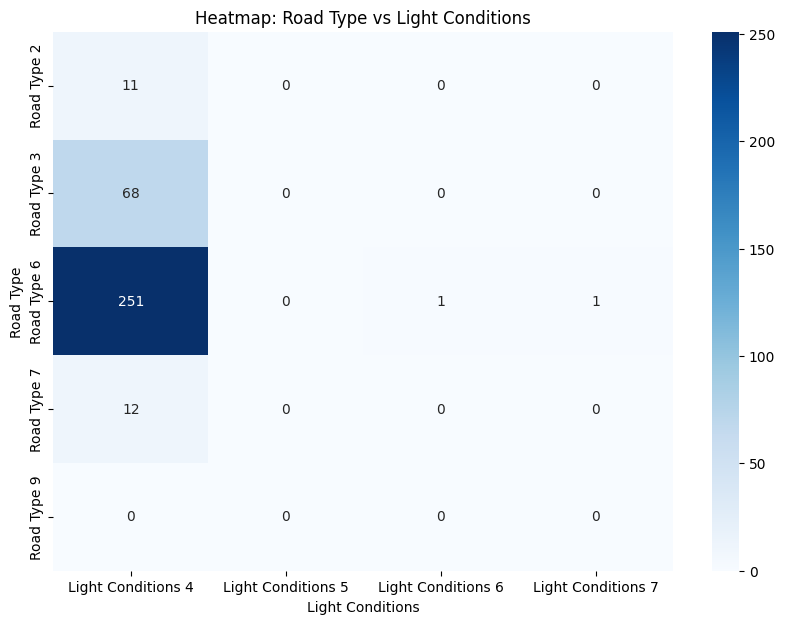

In [54]:
heatmap_data = pd.DataFrame()
# Sum the counts for each combination of Road_Type and Light_Conditions
for road in encoded_road_type:
    for light in encoded_light_conditions:
        heatmap_data.loc[road, light] = \
            final_df[(final_df[road] == 1) & (final_df[light] == 1)]["Number_of_Casualties"].count()

# Rename the index and column names for better readability
heatmap_data.index = [col.replace("Road_Type_", "Road Type ") for col in encoded_road_type]
heatmap_data.columns = [col.replace("Light_Conditions_", "Light Conditions ") \
                        for col in encoded_light_conditions]

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".0f")
plt.title("Heatmap: Road Type vs Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Road Type")
plt.show()

### Task 2 - Descriptive

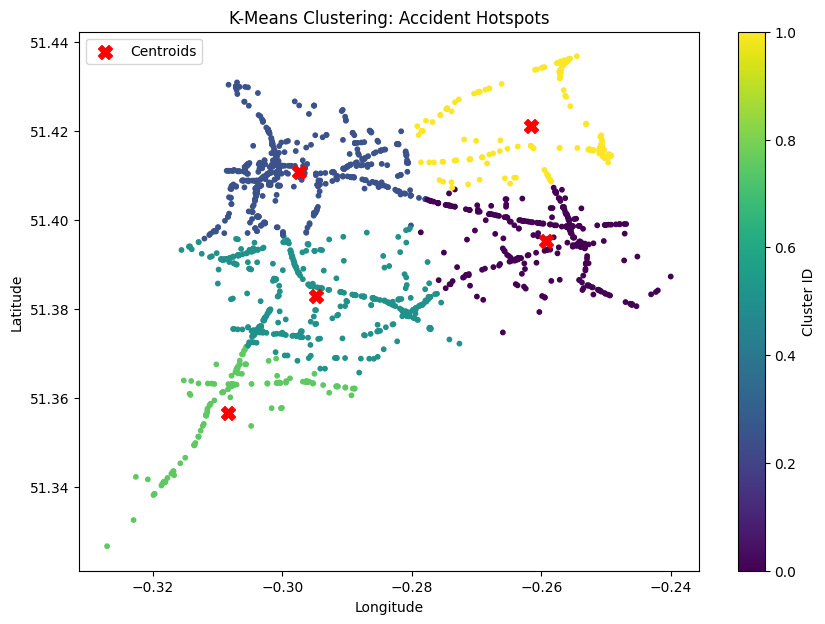

Cluster Centers (Longitude, Latitude):
[[-0.25935738 51.39523456]
 [-0.29743035 51.41073188]
 [-0.29471586 51.38300556]
 [-0.30837038 51.35655326]
 [-0.2616291  51.4211735 ]]


In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract relevant columns for clustering
geo_data = final_df[['Longitude', 'Latitude']].dropna()

# Step 2: Apply K-Means Clustering with multiple initializations
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Run K-means 10 times for better results
geo_data['Cluster'] = kmeans.fit_predict(geo_data)

# Step 3: Plot Clustering Results
plt.figure(figsize=(10, 7))
plt.scatter(geo_data['Longitude'], geo_data['Latitude'], c=geo_data['Cluster'], cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title("K-Means Clustering: Accident Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Cluster ID")
plt.legend()
plt.show()

# Display cluster centers
print("Cluster Centers (Longitude, Latitude):")
print(kmeans.cluster_centers_)

### Task 3 - Descriptive

In [56]:
# Define features (X) and target variable (y)
print(final_df.columns.tolist)

encoded_weather_conditions = [col for col in all_columns if 'Weather_Conditions' in col]
encoded_road_surface_conditions = [col for col in all_columns if 'Road_Surface_Conditions' in col]
encoded_speed_limit_conditions = [col for col in all_columns if 'Speed_limit' in col]
encoded_light_conditions = [col for col in all_columns if 'Light_Conditions' in col]

features = numerical_columns + encoded_road_type + encoded_speed_limit \
    + encoded_light_conditions + encoded_weather_conditions + encoded_road_surface_conditions

encoded_accident_severity_conditions = [col for col in all_columns if 'Accident_Severity' in col]

X = final_df[features]  # Predictor variables
y = final_df[encoded_accident_severity_conditions]  # Target variable

# Splitting the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, \
                                                random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


<bound method IndexOpsMixin.tolist of Index(['Number_of_Casualties', 'Number_of_Vehicles', 'Latitude', 'Longitude',
       'Road_Type_2', 'Road_Type_3', 'Road_Type_6', 'Road_Type_7',
       'Road_Type_9', 'Speed_limit_30', 'Speed_limit_40', 'Speed_limit_50',
       'Light_Conditions_4', 'Light_Conditions_5', 'Light_Conditions_6',
       'Light_Conditions_7', 'Accident_Severity_2', 'Accident_Severity_3',
       'Weather_Conditions_2', 'Weather_Conditions_3', 'Weather_Conditions_4',
       'Weather_Conditions_5', 'Weather_Conditions_7', 'Weather_Conditions_8',
       'Weather_Conditions_9', 'Road_Surface_Conditions_2',
       'Road_Surface_Conditions_3', 'Road_Surface_Conditions_4',
       'Road_Surface_Conditions_5'],
      dtype='object')>
Training set: (1349, 25) (1349, 2)
Validation set: (169, 25) (169, 2)
Test set: (169, 25) (169, 2)


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = dt_model.predict(X_val)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_pred_val))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_val, y_val, cmap="Blues")


Validation Accuracy: 0.8461538461538461

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.85      1.00      0.92       143

   micro avg       0.85      0.85      0.85       168
   macro avg       0.42      0.50      0.46       168
weighted avg       0.72      0.85      0.78       168
 samples avg       0.85      0.85      0.85       168



c:\Users\USER\CodeSpace\school\data_mining\accidents\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\CodeSpace\school\data_mining\accidents\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: multilabel-indicator is not supported

# =================================

# =================================

# =================================

# ================================= SANDBOX =================================

# =================================

# =================================

# =================================

# =================================

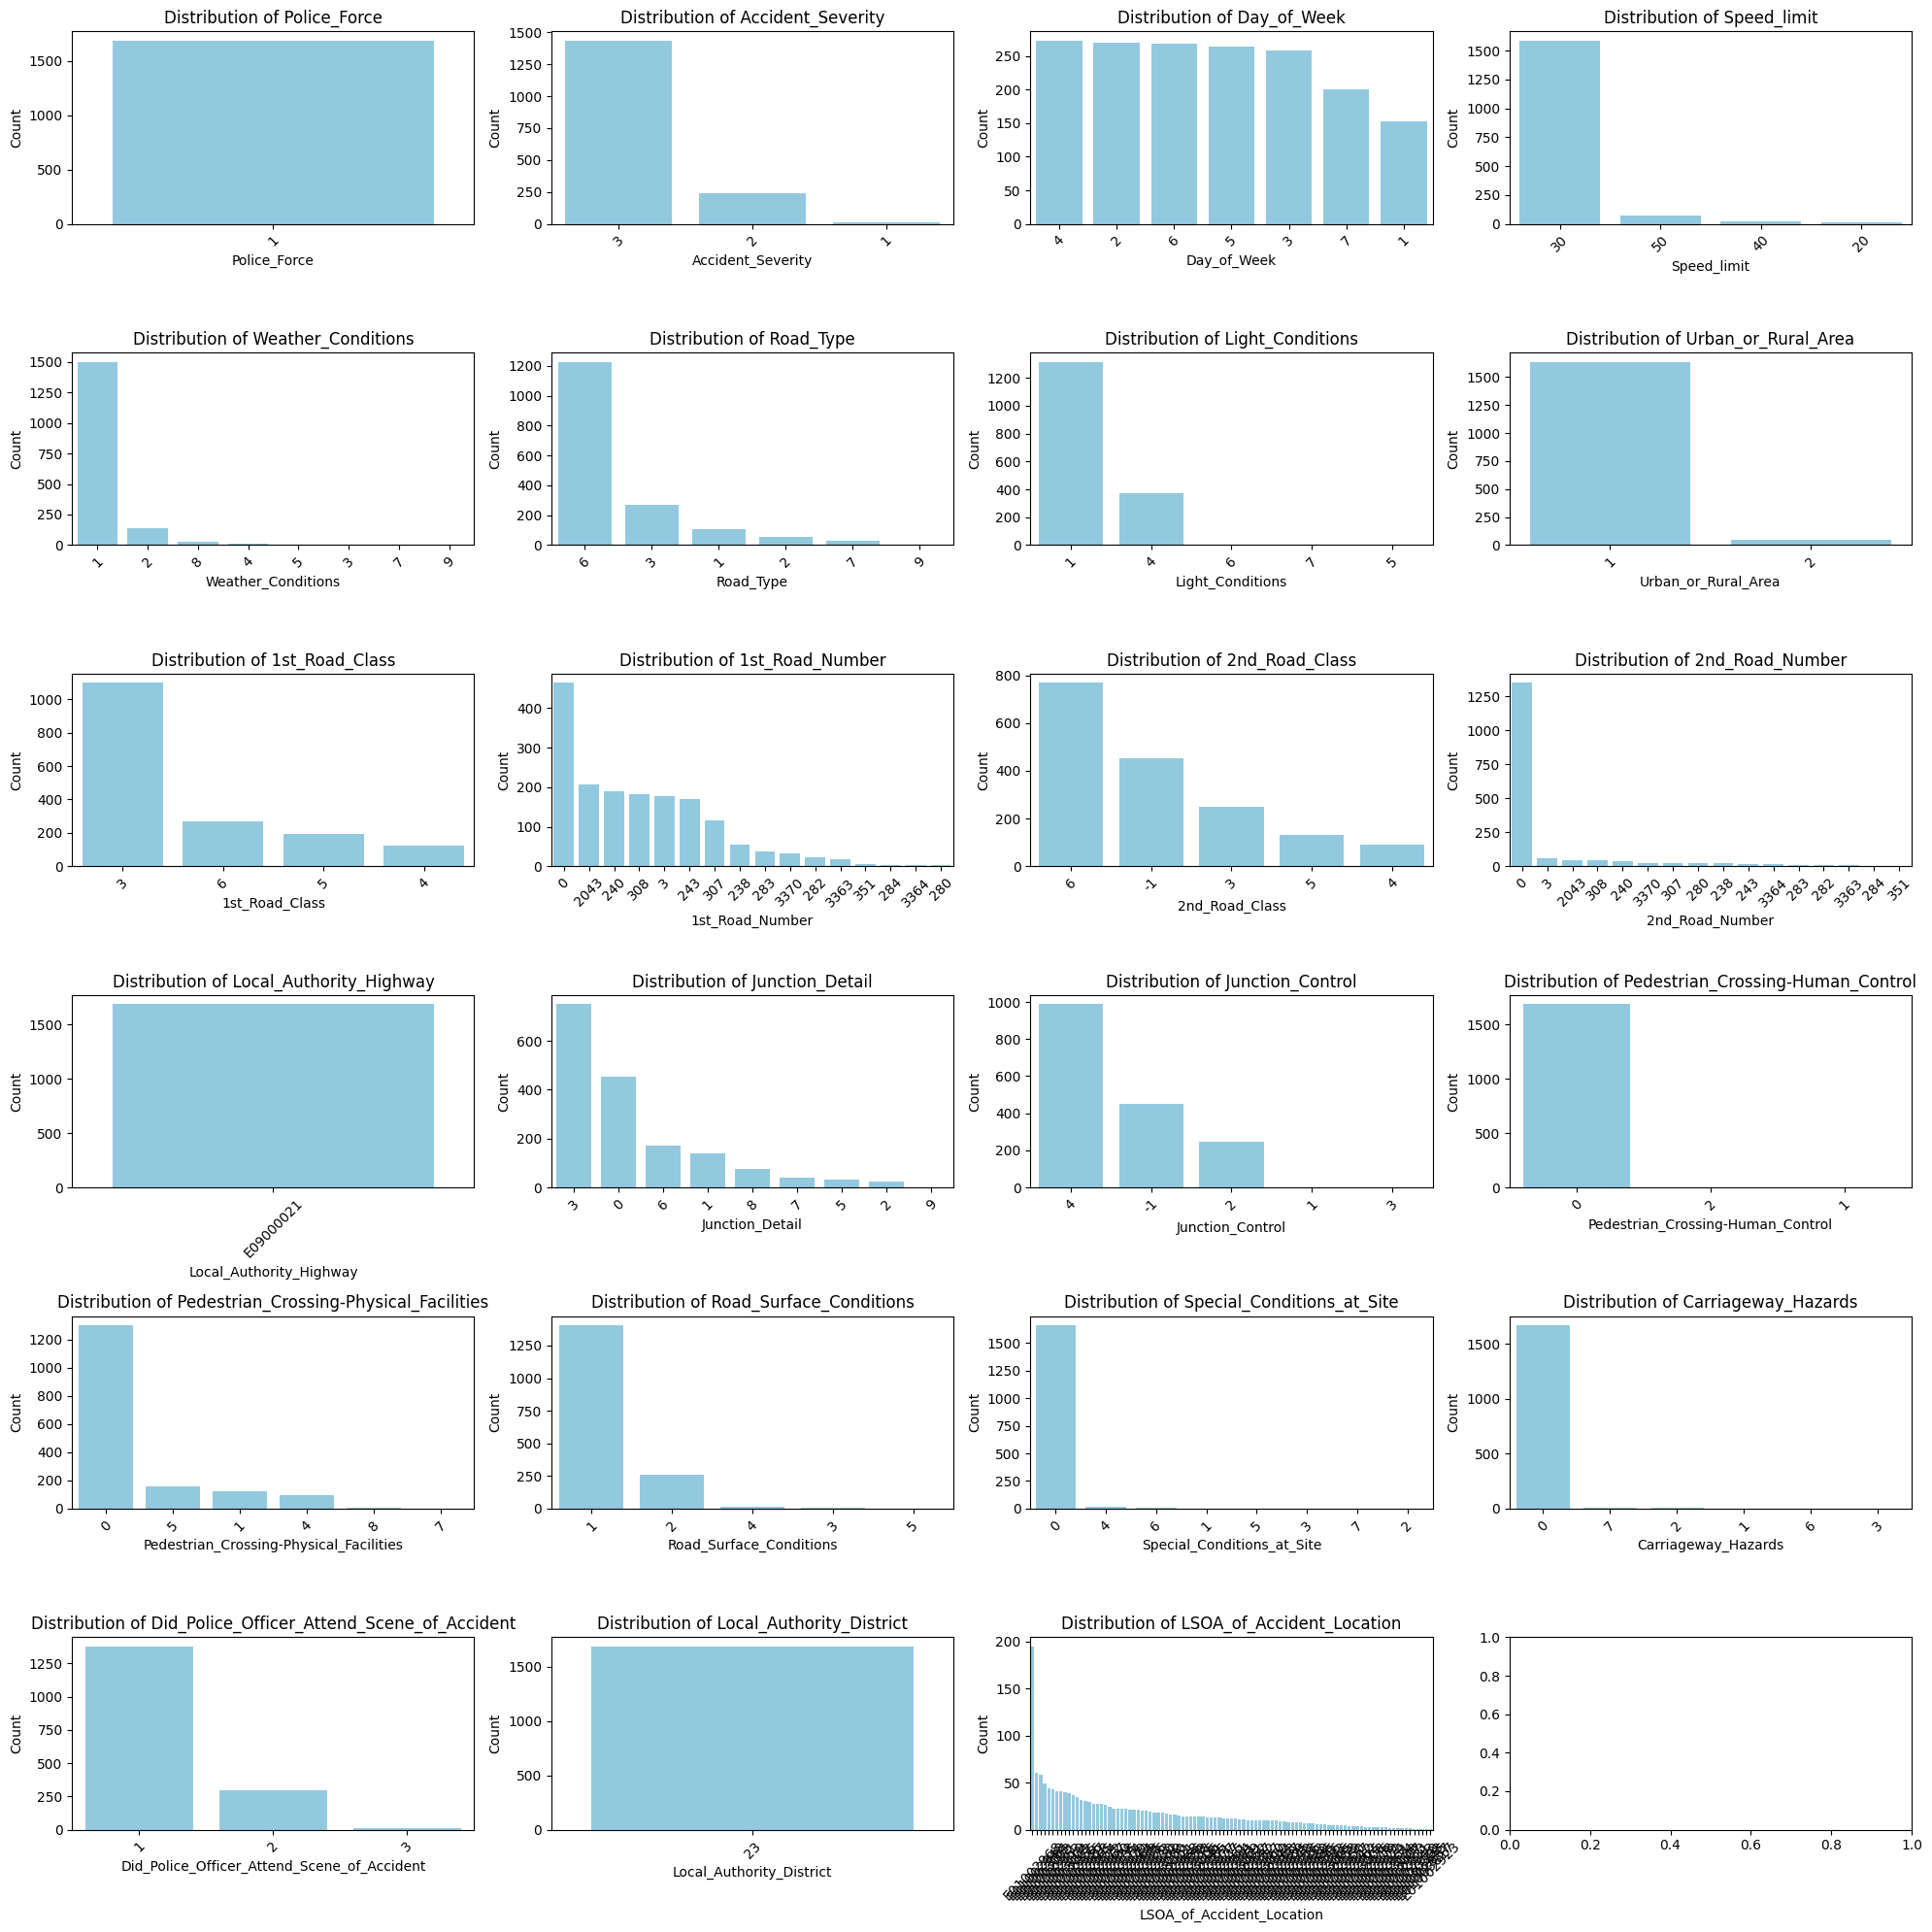

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(
        data=main_df,
        x=column,
        order=main_df[column].value_counts().index,
        color='skyblue',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Sandbox

In [131]:
"""
Function to change data types according to manually updated data-types.csv.
"""
def process_dataframe(df, csv_path):
    # Read the CSV file
    instructions = pd.read_csv(csv_path)
    
    # Iterate over the instructions
    for index, row in instructions.iterrows():
        col_name = row.iloc[0]
        new_type = row.iloc[1]
        
        # Change the data type of the column
        if new_type == "numerical":
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        elif new_type == "date":
            df[col_name] = pd.to_datetime(df[col_name], dayfirst=True, format='%d/%m/%Y', errors='coerce')
        elif new_type == "time":
            df[col_name] = pd.to_datetime(df[col_name], format='%H:%M').dt.time
        elif new_type == "categorical":
            df[col_name] = df[col_name].astype('str')
    
    return df

# Example usage
processed_df = process_dataframe(main_df, 'data_types.csv')
processed_df.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                           object
Accident_Severity                                      object
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                            object
Time                                                   object
Local_Authority_District                               object
Local_Authority_Highway                                object
1st_Road_Class                                         object
1st_Road_Number                                        object
Road_Typ

TypeError: Invalid object type at position 0

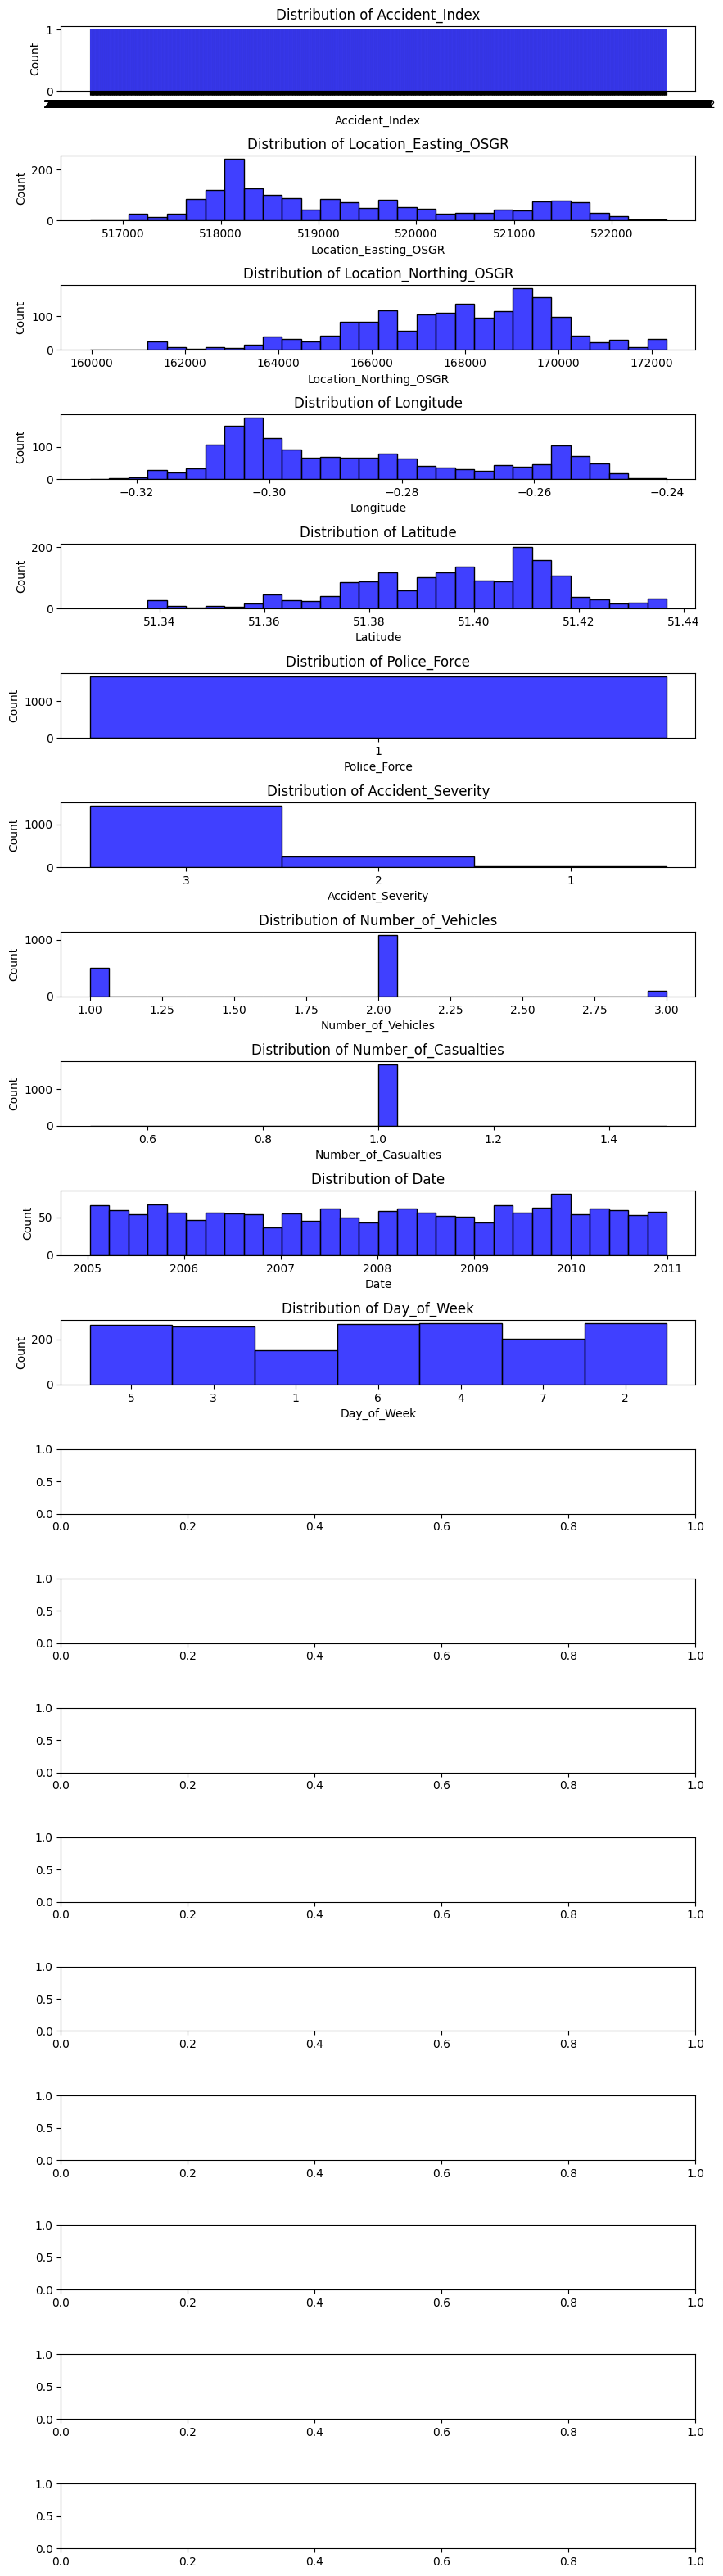

In [132]:
# Assuming 'df' is your DataFrame
# Limit the number of columns if you have too many to avoid clutter
columns_to_plot = processed_df.columns[:20]  # Adjust the number of columns based on your preference

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 40))
fig.subplots_adjust(hspace=1)  # Adjust space between plots

# Plot each column as a histogram
for i, col in enumerate(columns_to_plot):
    sns.histplot(processed_df[col], bins=30, kde=False, ax=axes[i], color='blue')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
""" 
Checking missing values
"""
# Define all conditions for missing or invalid values
conditions = [
    processed_df.isnull(),                # NaN or None
    processed_df.isna(),                  # Alias for isnull()
    (processed_df == 'Nan'),              # String 'Nan'
    (processed_df == 'nan'),              # String 'nan'
    (processed_df == pd.NA),              # Pandas NA
    (processed_df == '-1'),               # String '-1'
    (processed_df == ''),                 # Empty string
    (processed_df == 'NULL'),             # String 'NULL'
    (processed_df == None)                # Python None
]

# Combine all conditions using logical OR
combined_mask = conditions[0]
for condition in conditions[1:]:
    combined_mask |= condition

# Count missing values per column
missing_values = combined_mask.sum()

# Print the results
print(missing_values)


Accident_Index                                   0
Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                             0
Local_Authority_District                         0
Local_Authority_Highway                          0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Detail                                  0
Junction_Control               

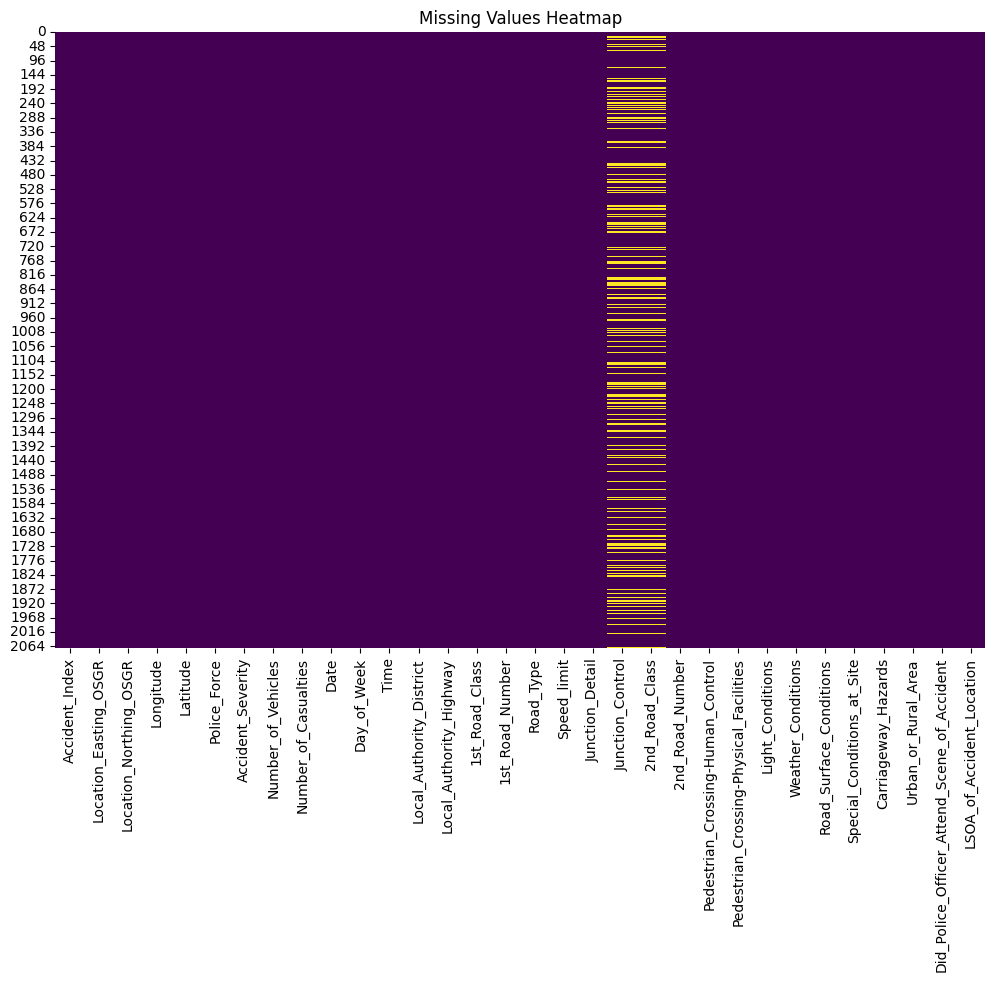

In [ ]:
# Create a heatmap to visualize the missing values
plt.figure(figsize=(12, 8))
sns.heatmap(combined_mask, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
#Outliers
print(processed_df.shape)
# Select numeric variables
my_data_numeric = processed_df.select_dtypes(include='number')
print('The dataset has', len(my_data_numeric.columns),'Numeric variables:')
print(my_data_numeric)

# Select categorical variables
my_data_categorical = processed_df.select_dtypes(include='object')
print('The dataset has', len(my_data_categorical.columns),'Categorical variables:')
print(my_data_categorical)


(2070, 32)
The dataset has 6 Numeric variables:
      Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                    521760                  169840  -0.250492  51.414457   
1                    518140                  165370  -0.304009  51.375047   
2                    519130                  163980  -0.290258  51.362347   
3                    520840                  167190  -0.264617  51.390837   
4                    521280                  172110  -0.256614  51.434962   
...                     ...                     ...        ...        ...   
2065                 517330                  161850  -0.316802  51.343577   
2066                 517870                  169360  -0.306563  51.410965   
2067                 519370                  169000  -0.285126  51.407416   
2068                 519330                  169110  -0.285664  51.408413   
2069                 521830                  169870  -0.249475  51.414712   

      Number_of_Vehicles  N

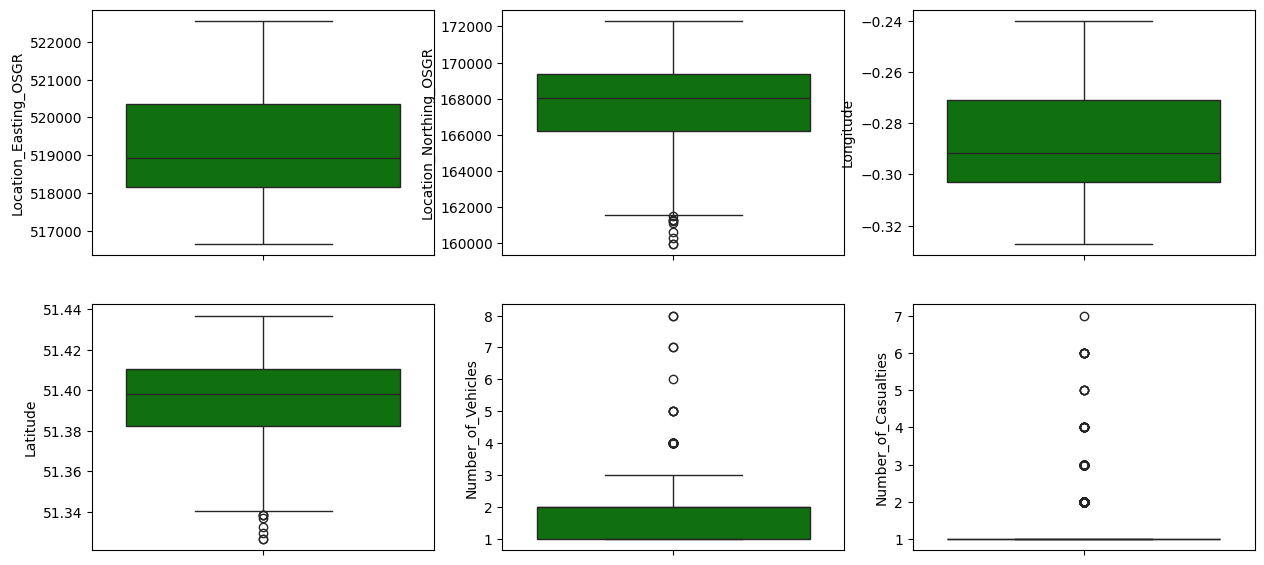

In [ ]:
# Outliers - For numerics
fig = plt.figure(figsize= (15,30))

for i in range(len(my_data_numeric.columns)):
    column = my_data_numeric.columns[i]
    sub = fig.add_subplot(8,3,i+1)
    chart = sns.boxplot(data=my_data_numeric, y=column, color='g')

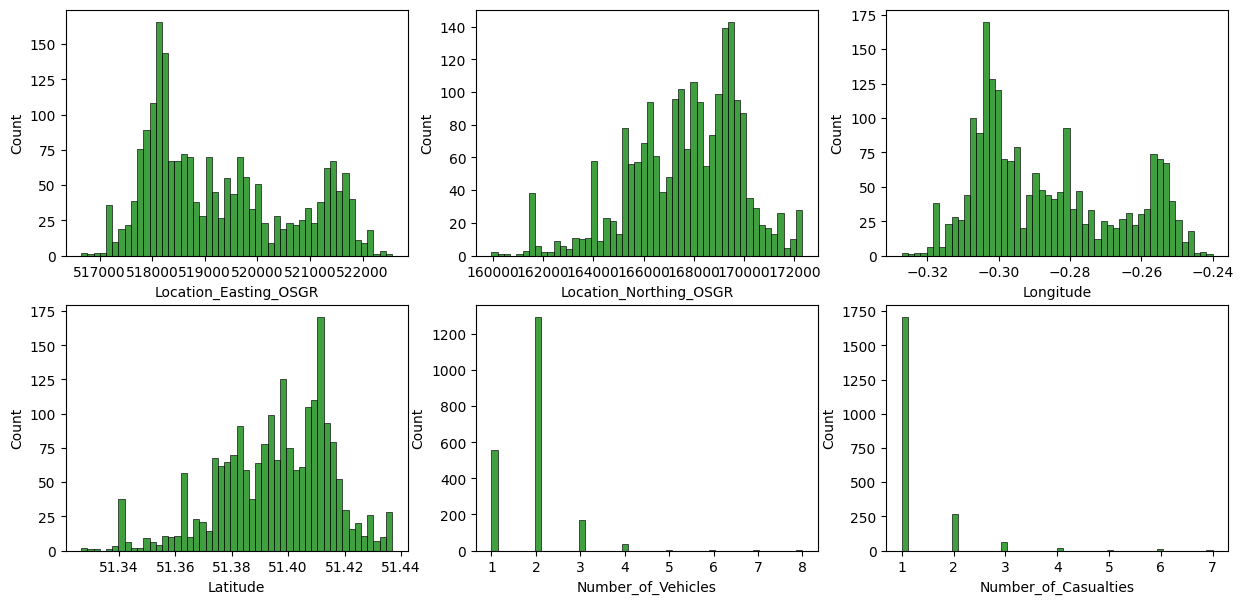

In [ ]:
# Use histogram for all the numeical variables
fig = plt.figure(figsize= (15,30))

for i in range(len(my_data_numeric.columns)):
    column = my_data_numeric.columns[i]
    sub = fig.add_subplot(8,3, i+1)
    chart = sns.histplot(data=my_data_numeric, x=column, bins=50, color='g', kde=False)

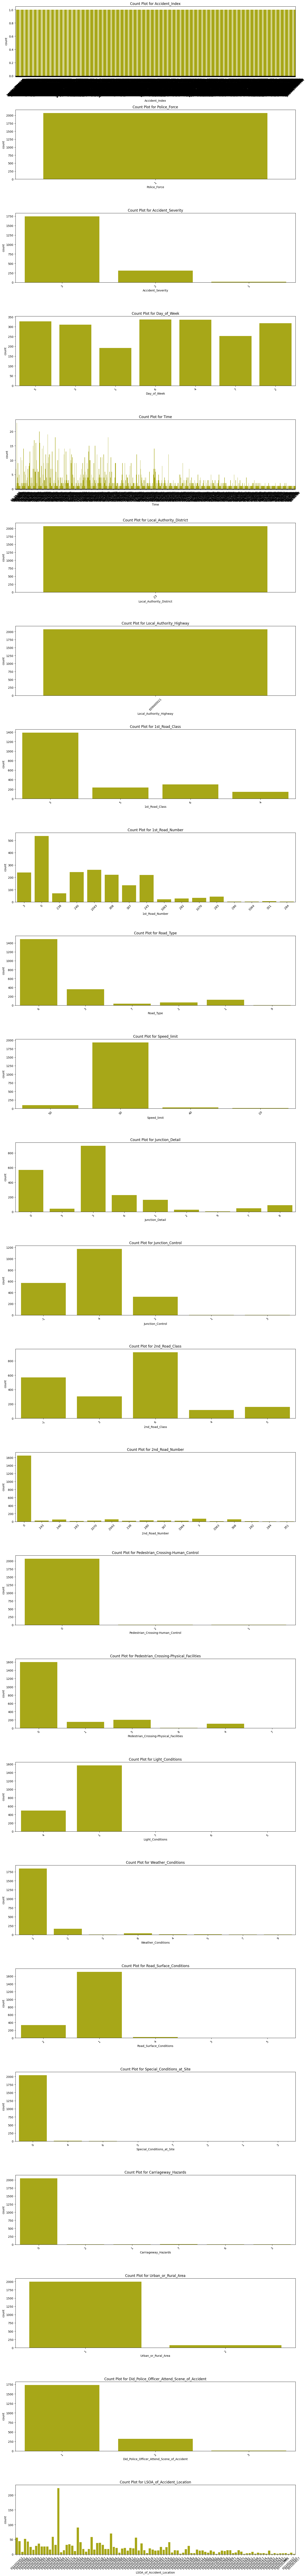

In [ ]:
# Outliers - for categorical values
# Number of categorical variables
num_categorical = len(my_data_categorical.columns)

# Create a figure with enough rows
fig = plt.figure(figsize=(15, num_categorical * 5))  # Adjust height dynamically

for i, column in enumerate(my_data_categorical.columns):
    sub = fig.add_subplot(num_categorical, 1, i+1)  # Use the total number of plots
    sns.countplot(data=processed_df, x=column, color='y', ax=sub)  # Use ax=sub for subplot integration
    sub.set_title(f"Count Plot for {column}", fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for clarity

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
#Tackle data quality issues
# Drop duplicates
processed_df = processed_df[processed_df.columns[~processed_df.columns.isin(['Location_Easting_OSGR', 'Location_Northing_OSGR'])]] # Drop two variables TOWN_No and CMEDV
processed_df

Accident_Index  Longitude   Latitude Police_Force Accident_Severity  \
0     200501TE00016  -0.250492  51.414457            1                 3   
1     200501TE00017  -0.304009  51.375047            1                 3   
2     200501TE00026  -0.290258  51.362347            1                 2   
3     200501TE00039  -0.264617  51.390837            1                 3   
4     200501TE00060  -0.256614  51.434962            1                 2   
...             ...        ...        ...          ...               ...   
2065  201001VK30404  -0.316802  51.343577            1                 3   
2066  201001VK30408  -0.306563  51.410965            1                 3   
2067  201001VK30420  -0.285126  51.407416            1                 3   
2068  201001VK39057  -0.285664  51.408413            1                 2   
2069  201001VW40202  -0.249475  51.414712            1                 3   

      Number_of_Vehicles  Number_of_Casualties       Date Day_of_Week  \
0                      1                     1 2005-01-13           5   
1                      3                     1 2005-01-18           3   
2                      2                     2 2005-01-09           1   
3                      3                     1 2005-01-23           1   
4                      2                     1 2005-01-21           6   
...                  ...                   ...        ...         ...   
2065                   2                     1 2010-12-14           3   
2066                   2                     1 2010-12-22           4   
2067                   2                     1 2010-11-08           2   
2068                   1                     1 2010-05-17           2   
2069                   2                     1 2010-06-17           5   

          Time  ... Pedestrian_Crossing-Human_Control  \
0     07:25:00  ...                                 0   
1     08:35:00  ...                                 0   
2     01:17:00  ...                                 0   
3     18:00:00  ...                                 0   
4     06:20:00  ...                                 0   
...        ...  ...                               ...   
2065  14:45:00  ...                                 0   
2066  16:10:00  ...                                 0   
2067  08:00:00  ...                                 0   
2068  18:45:00  ...                                 0   
2069  18:00:00  ...                                 0   

     Pedestrian_Crossing-Physical_Facilities Light_Conditions  \
0                                          0                4   
1                                          0                1   
2                                          0                4   
3                                          0                4   
4                                          0                4   
...                                      ...              ...   
2065                                       0                1   
2066                                       5                4   
2067                                       0                1   
2068                                       4                1   
2069                                       0                1   

     Weather_Conditions Road_Surface_Conditions Special_Conditions_at_Site  \
0                     1                       2                          0   
1                     1                       2                          0   
2                     1                       1                          0   
3                     1                       1                          0   
4                     1                       1                          0   
...                 ...                     ...                        ...   
2065                  1                       1                          0   
2066                  1                       1                          0   
2067                  2                       2

In [ ]:
my_data_no_missing = processed_df.dropna()
my_data_no_missing.shape

(2070, 30)

In [ ]:
numerical_cols = ['Number_of_Casualties', 'Longitude', 'Latitude']

# Remove outliers using IQR
outliers_index = []
for col in numerical_cols:
    Q1 = my_data_no_missing[col].quantile(0.25)
    Q3 = my_data_no_missing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_index += my_data_no_missing.index[(my_data_no_missing[col] < lower_bound) | (my_data_no_missing[col] > upper_bound)].tolist()

# Drop rows with outliers
outliers_index = set(outliers_index)
my_data_cleaned = my_data_no_missing.drop(index=outliers_index)
my_data_cleaned.shape

(1705, 30)

## ?

In [ ]:
#analysis without outlier removing
light_conditions_count = my_data_cleaned['Light_Conditions'].value_counts(normalize=True)
print("Proportion of Light Conditions:")
print(light_conditions_count)

# Example: Analyzing Weather Conditions
weather_conditions_count = my_data_cleaned['Weather_Conditions'].value_counts(normalize=True)
print("Proportion of Weather Conditions:")
print(weather_conditions_count)

Proportion of Light Conditions:
Light_Conditions
1    0.777713
4    0.221114
7    0.000587
6    0.000587
Name: proportion, dtype: float64
Proportion of Weather Conditions:
Weather_Conditions
1    0.889736
2    0.080938
8    0.015249
4    0.006452
5    0.002933
3    0.002346
7    0.001760
9    0.000587
Name: proportion, dtype: float64


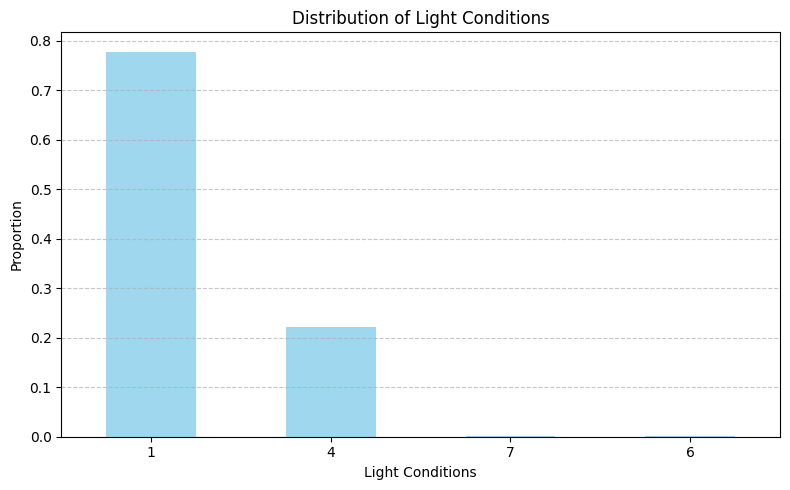

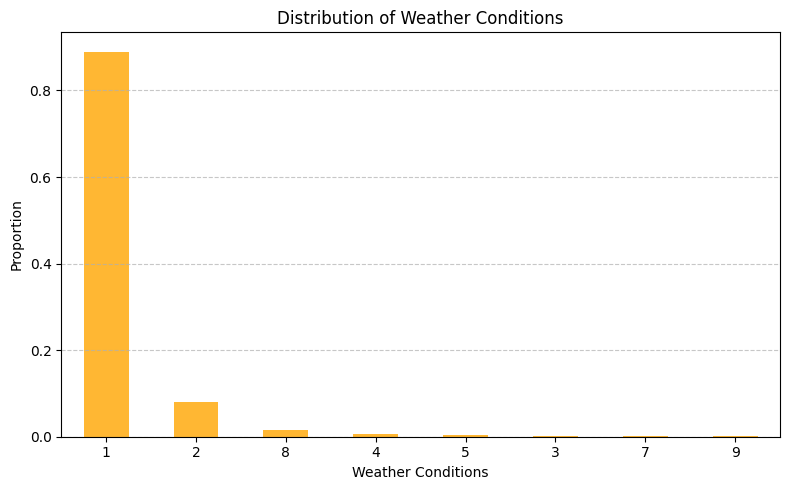

In [ ]:
# Plot for Light_Conditions
plt.figure(figsize=(8, 5))
light_conditions_count.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Distribution of Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for Weather_Conditions
plt.figure(figsize=(8, 5))
weather_conditions_count.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Filter rows for serious and fatal accidents
serious_accidents = my_data_cleaned[my_data_cleaned['Accident_Severity'].isin(['Serious', 'Fatal'])]

# Analyze Weather Conditions for serious accidents
serious_weather = serious_accidents['Weather_Conditions'].value_counts(normalize=True)
print("Weather Conditions for Serious/Fatal Accidents:")
print(serious_weather)

# Analyze Road Surface Conditions for serious accidents
serious_road_surface = serious_accidents['Road_Surface_Conditions'].value_counts(normalize=True)
print("Road Surface Conditions for Serious/Fatal Accidents:")
print(serious_road_surface)

Weather Conditions for Serious/Fatal Accidents:
Series([], Name: proportion, dtype: float64)
Road Surface Conditions for Serious/Fatal Accidents:
Series([], Name: proportion, dtype: float64)


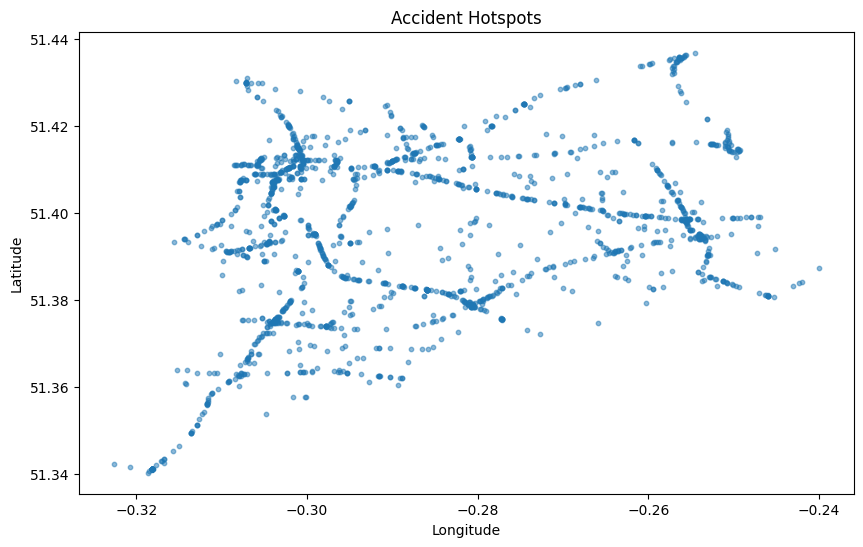

In [ ]:
# Plot accident hotspots
plt.figure(figsize=(10, 6))
plt.scatter(my_data_cleaned['Longitude'], my_data_cleaned['Latitude'], alpha=0.5, s=10)
plt.title("Accident Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
import folium

# Create a base map centered around the mean location
center_lat = my_data_cleaned['Latitude'].mean()
center_lon = my_data_cleaned['Longitude'].mean()
map_hotspots = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Add individual markers for each accident location
for _, row in my_data_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,  # Radius of the marker
        color='blue',  # Border color of the circle
        fill=True,
        fill_color='blue',  # Fill color of the circle
        fill_opacity=0.6  # Opacity of the marker
    ).add_to(map_hotspots)

# Display the map
map_hotspots

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered around the mean latitude and longitude
center_lat = my_data_cleaned['Latitude'].mean()
center_lon = my_data_cleaned['Longitude'].mean()
map_hotspots = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Create a marker cluster to group nearby accidents
marker_cluster = MarkerCluster().add_to(map_hotspots)

# Add markers for each accident location
for _, row in my_data_cleaned.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(marker_cluster)

# Display the map
map_hotspots


(1705, 30)


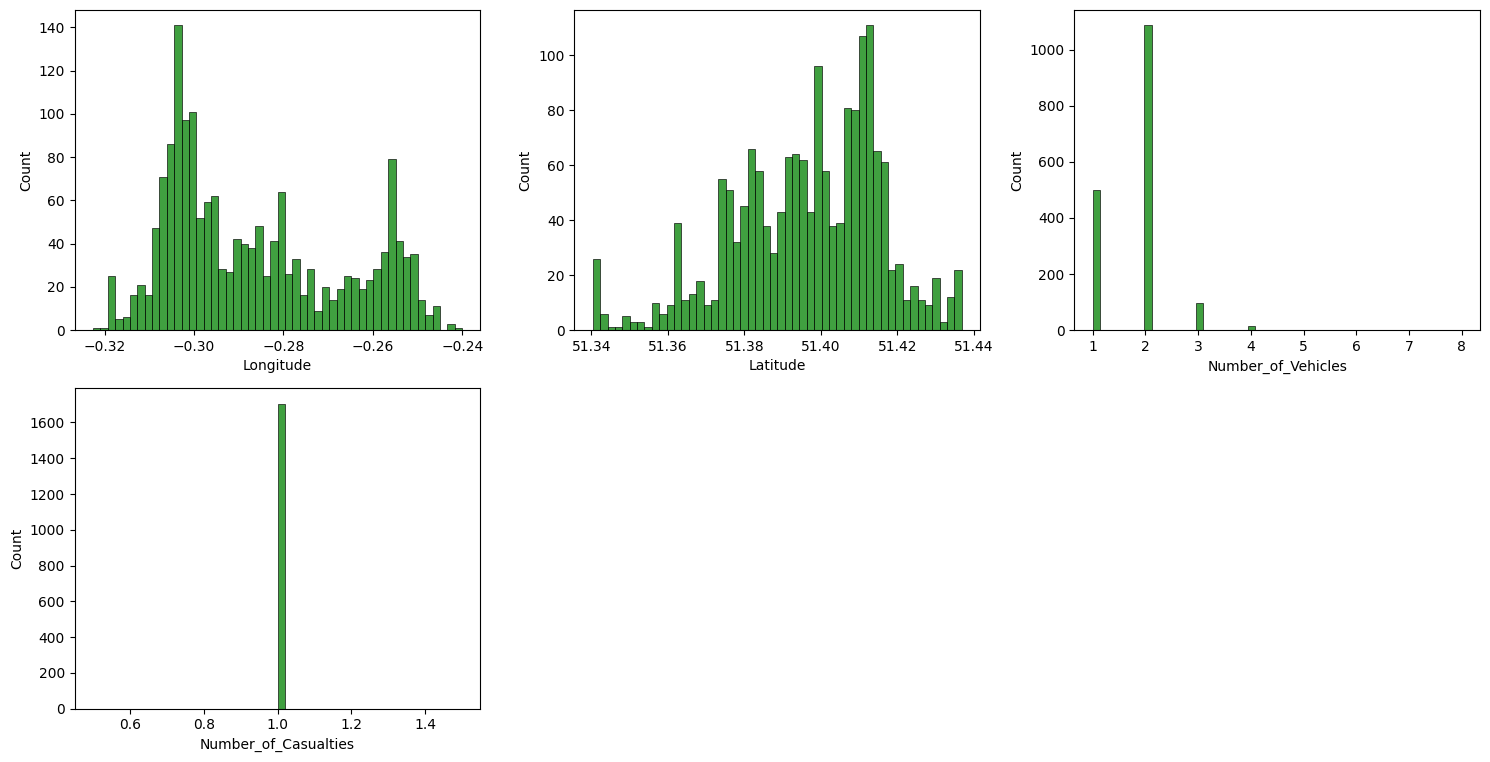

In [ ]:
print(my_data_cleaned.shape)
fig = plt.figure(figsize=(15, 30))

# Filter numeric columns
numeric_cols = my_data_cleaned.select_dtypes(include='number').columns

for i, column in enumerate(numeric_cols):
    sub = fig.add_subplot(8, 3, i + 1)
    chart = sns.histplot(data=my_data_cleaned, x=column, bins=50, color='g', kde=False)

plt.tight_layout()
plt.show()


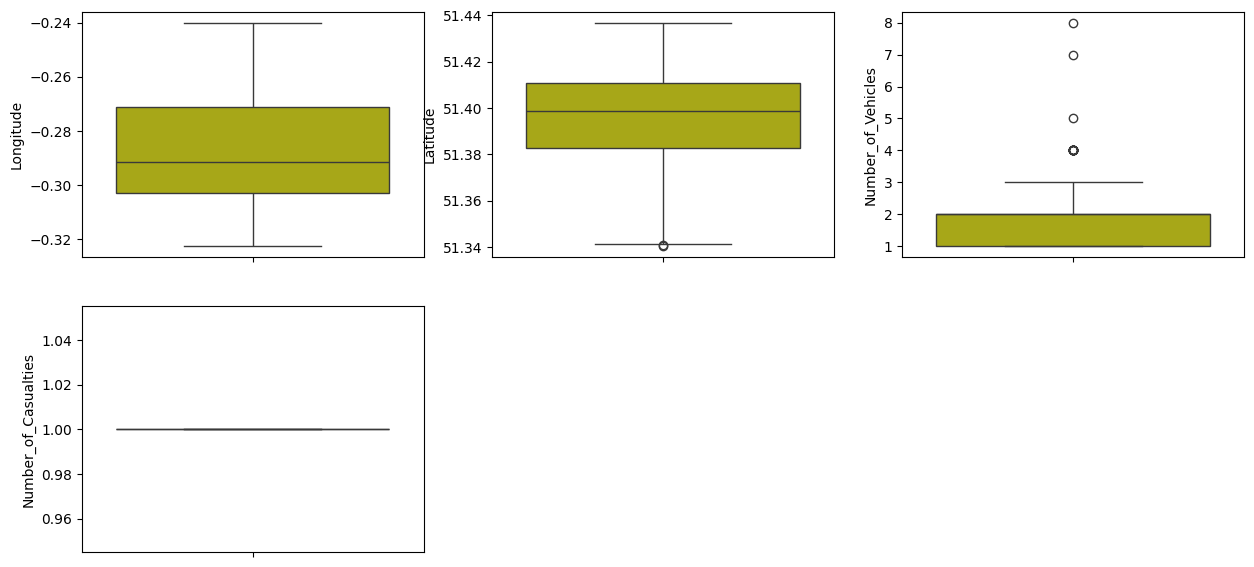

In [ ]:
# Plot Boxplot after IQR applied
fig = plt.figure(figsize=(15, 30))

my_data = my_data_cleaned.select_dtypes(include='number')

for i in range(len(my_data.columns)):
    column = my_data.columns[i]
    sub = fig.add_subplot(8, 3, i + 1)
    chart = sns.boxplot(data=my_data, y=column, color='y')

### Imbalanced Classes

In [ ]:
# List of categorical columns
categorical_cols = [
    'Police_Force', 'Accident_Severity', 'Day_of_Week', 'Local_Authority_District',
    'Local_Authority_Highway', '1st_Road_Class', 'Road_Type', 'Speed_limit',
    'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
    'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
    'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
    'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'
]

# Analyze and visualize distributions
for col in categorical_cols:
    print(f"Class distribution for {col}:")
    print(my_data_cleaned[col].value_counts(normalize=True) * 100)  # Print proportions
    print()

    # Plot class distribution
    plt.figure(figsize=(8, 4))
    my_data_cleaned[col].value_counts(normalize=True).plot(
        kind='bar', color='green', alpha=0.8
    )
    plt.title(f"Class Distribution for {col}")
    plt.xlabel("Class")
    plt.ylabel("Proportion (%)")
    plt.xticks(rotation=45)
    plt.show()

Class distribution for Police_Force:


NameError: name 'my_data_cleaned' is not defined

Statistics for Police_Force:

Counts:
Police_Force
1    1705
Name: count, dtype: int64
Proportions (%):
Police_Force
1    100.0
Name: proportion, dtype: float64
Mode: 1



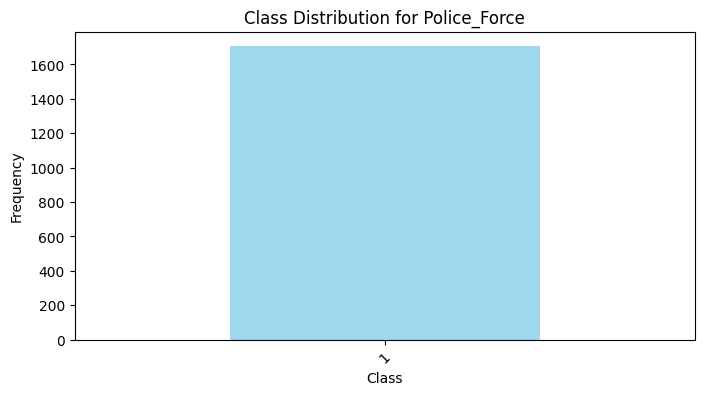

Statistics for Accident_Severity:

Counts:
Accident_Severity
3    1452
2     244
1       9
Name: count, dtype: int64
Proportions (%):
Accident_Severity
3    85.161290
2    14.310850
1     0.527859
Name: proportion, dtype: float64
Mode: 3



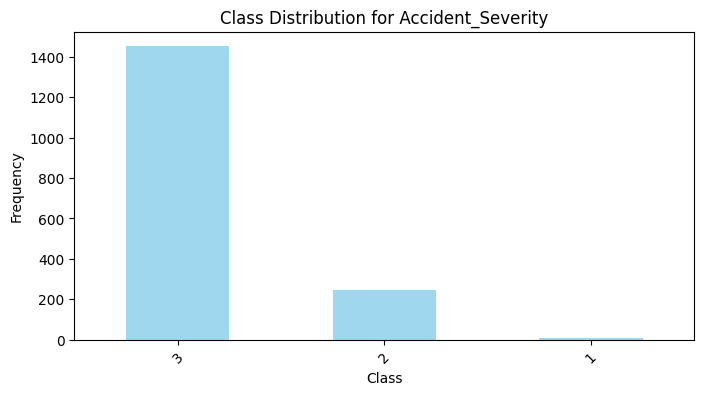

Statistics for Day_of_Week:

Counts:
Day_of_Week
6    278
4    273
2    270
5    266
3    261
7    205
1    152
Name: count, dtype: int64
Proportions (%):
Day_of_Week
6    16.304985
4    16.011730
2    15.835777
5    15.601173
3    15.307918
7    12.023460
1     8.914956
Name: proportion, dtype: float64
Mode: 6



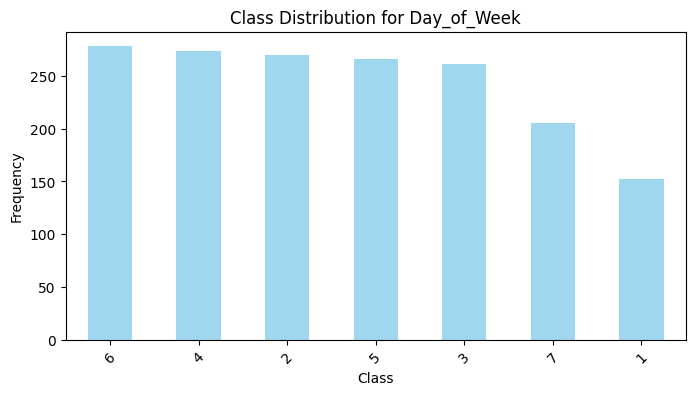

Statistics for Local_Authority_District:

Counts:
Local_Authority_District
23    1705
Name: count, dtype: int64
Proportions (%):
Local_Authority_District
23    100.0
Name: proportion, dtype: float64
Mode: 23



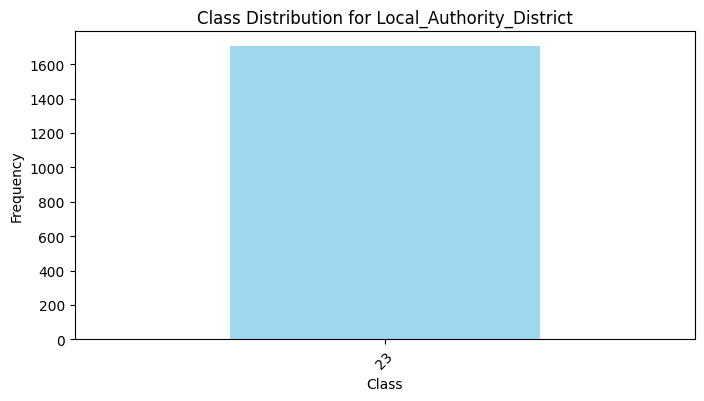

Statistics for Local_Authority_Highway:

Counts:
Local_Authority_Highway
E09000021    1705
Name: count, dtype: int64
Proportions (%):
Local_Authority_Highway
E09000021    100.0
Name: proportion, dtype: float64
Mode: E09000021



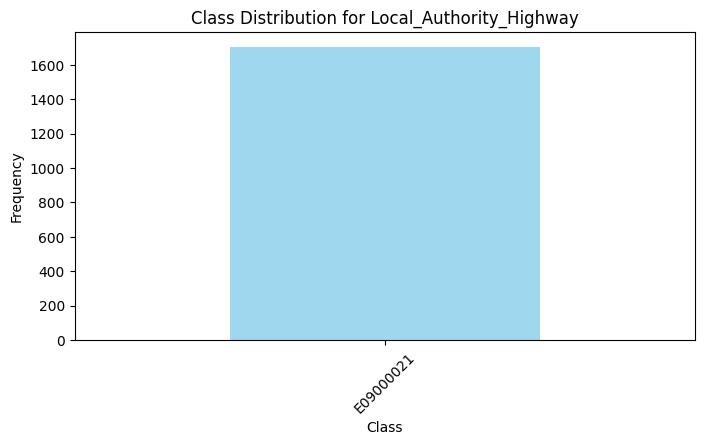

Statistics for 1st_Road_Class:

Counts:
1st_Road_Class
3    1114
6     270
5     196
4     125
Name: count, dtype: int64
Proportions (%):
1st_Road_Class
3    65.337243
6    15.835777
5    11.495601
4     7.331378
Name: proportion, dtype: float64
Mode: 3



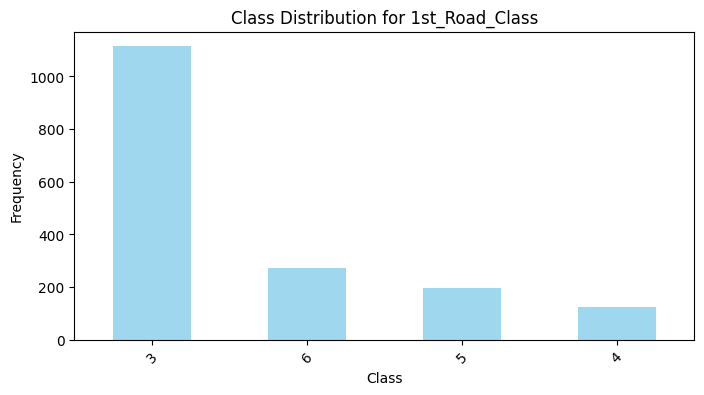

Statistics for Road_Type:

Counts:
Road_Type
6    1233
3     279
1     108
2      54
7      30
9       1
Name: count, dtype: int64
Proportions (%):
Road_Type
6    72.316716
3    16.363636
1     6.334311
2     3.167155
7     1.759531
9     0.058651
Name: proportion, dtype: float64
Mode: 6



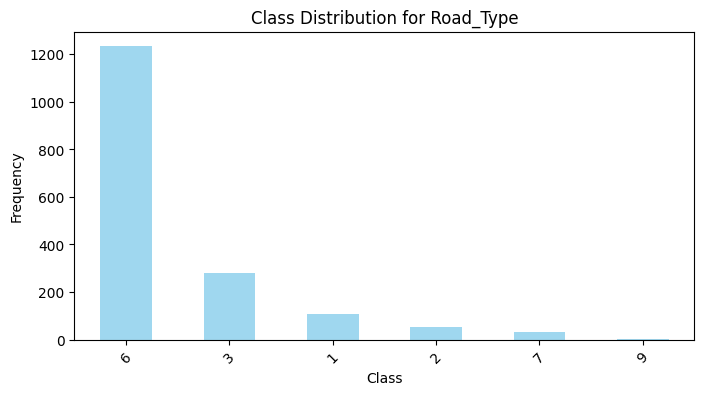

Statistics for Speed_limit:

Counts:
Speed_limit
30    1599
50      74
40      21
20      11
Name: count, dtype: int64
Proportions (%):
Speed_limit
30    93.782991
50     4.340176
40     1.231672
20     0.645161
Name: proportion, dtype: float64
Mode: 30



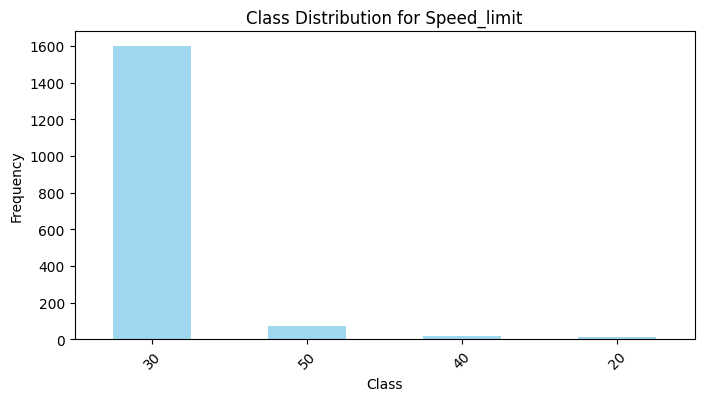

Statistics for Junction_Detail:

Counts:
Junction_Detail
3    760
0    462
6    173
1    142
8     71
7     40
5     30
2     25
9      2
Name: count, dtype: int64
Proportions (%):
Junction_Detail
3    44.574780
0    27.096774
6    10.146628
1     8.328446
8     4.164223
7     2.346041
5     1.759531
2     1.466276
9     0.117302
Name: proportion, dtype: float64
Mode: 3



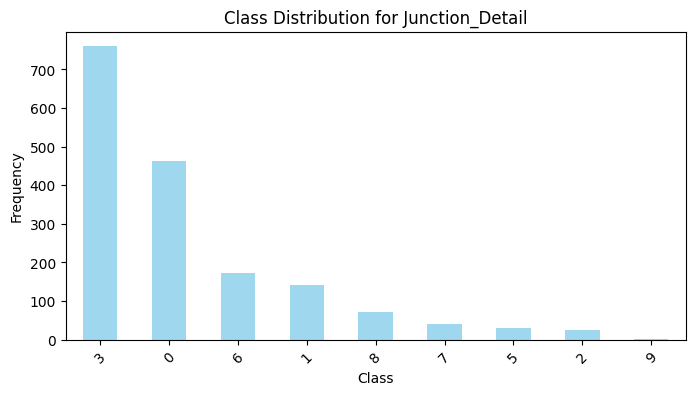

Statistics for Junction_Control:

Counts:
Junction_Control
4     994
-1    462
2     248
1       1
Name: count, dtype: int64
Proportions (%):
Junction_Control
4     58.299120
-1    27.096774
2     14.545455
1      0.058651
Name: proportion, dtype: float64
Mode: 4



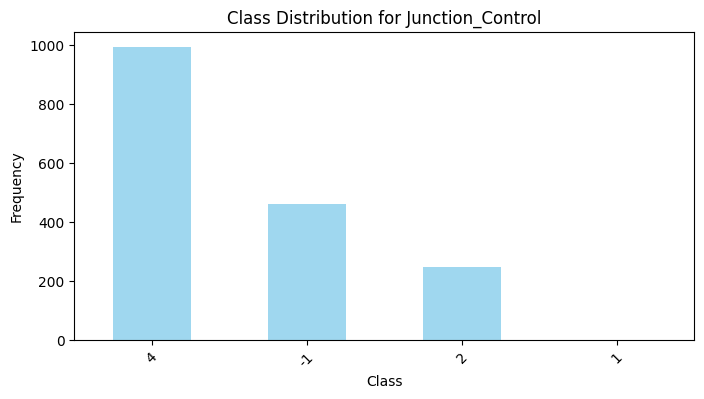

Statistics for 2nd_Road_Class:

Counts:
2nd_Road_Class
6     769
-1    462
3     253
5     131
4      90
Name: count, dtype: int64
Proportions (%):
2nd_Road_Class
6     45.102639
-1    27.096774
3     14.838710
5      7.683284
4      5.278592
Name: proportion, dtype: float64
Mode: 6



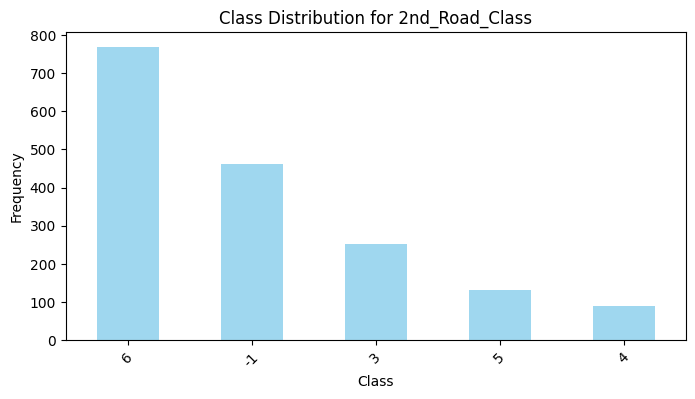

Statistics for Pedestrian_Crossing-Human_Control:

Counts:
Pedestrian_Crossing-Human_Control
0    1703
2       2
Name: count, dtype: int64
Proportions (%):
Pedestrian_Crossing-Human_Control
0    99.882698
2     0.117302
Name: proportion, dtype: float64
Mode: 0



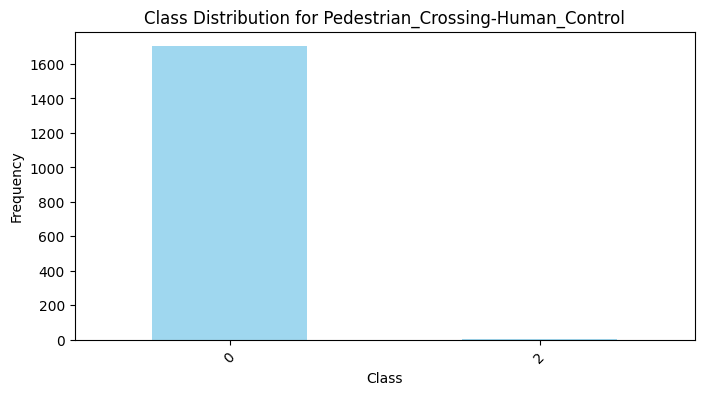

Statistics for Pedestrian_Crossing-Physical_Facilities:

Counts:
Pedestrian_Crossing-Physical_Facilities
0    1316
5     157
1     127
4      96
8       7
7       2
Name: count, dtype: int64
Proportions (%):
Pedestrian_Crossing-Physical_Facilities
0    77.184751
5     9.208211
1     7.448680
4     5.630499
8     0.410557
7     0.117302
Name: proportion, dtype: float64
Mode: 0



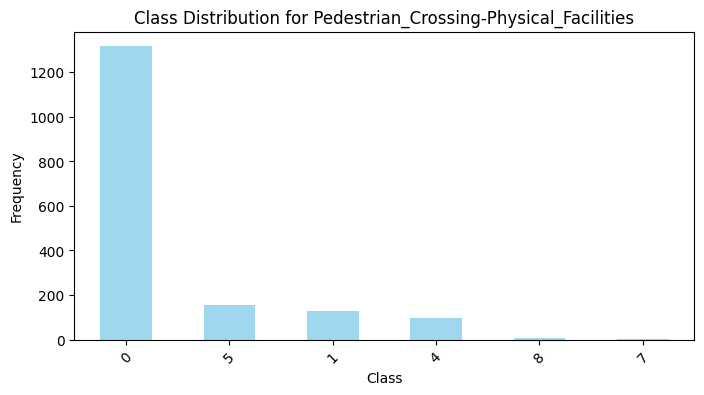

Statistics for Light_Conditions:

Counts:
Light_Conditions
1    1326
4     377
7       1
6       1
Name: count, dtype: int64
Proportions (%):
Light_Conditions
1    77.771261
4    22.111437
7     0.058651
6     0.058651
Name: proportion, dtype: float64
Mode: 1



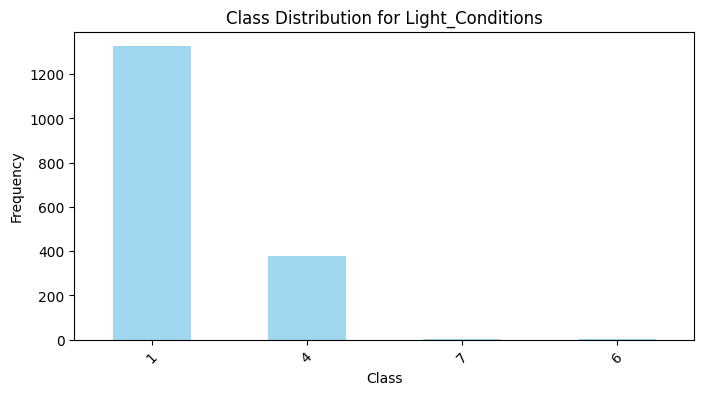

Statistics for Weather_Conditions:

Counts:
Weather_Conditions
1    1517
2     138
8      26
4      11
5       5
3       4
7       3
9       1
Name: count, dtype: int64
Proportions (%):
Weather_Conditions
1    88.973607
2     8.093842
8     1.524927
4     0.645161
5     0.293255
3     0.234604
7     0.175953
9     0.058651
Name: proportion, dtype: float64
Mode: 1



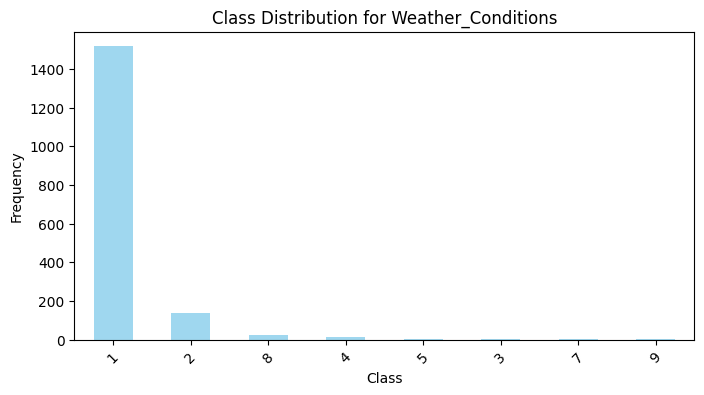

Statistics for Road_Surface_Conditions:

Counts:
Road_Surface_Conditions
1    1420
2     265
4      16
3       4
Name: count, dtype: int64
Proportions (%):
Road_Surface_Conditions
1    83.284457
2    15.542522
4     0.938416
3     0.234604
Name: proportion, dtype: float64
Mode: 1



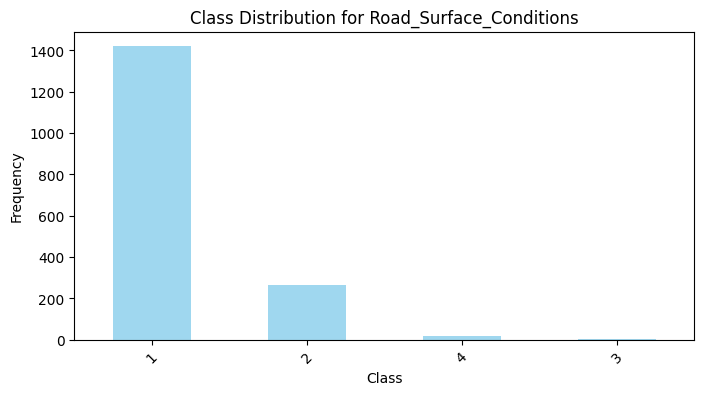

Statistics for Special_Conditions_at_Site:

Counts:
Special_Conditions_at_Site
0    1681
4      12
6       8
5       1
7       1
1       1
3       1
Name: count, dtype: int64
Proportions (%):
Special_Conditions_at_Site
0    98.592375
4     0.703812
6     0.469208
5     0.058651
7     0.058651
1     0.058651
3     0.058651
Name: proportion, dtype: float64
Mode: 0



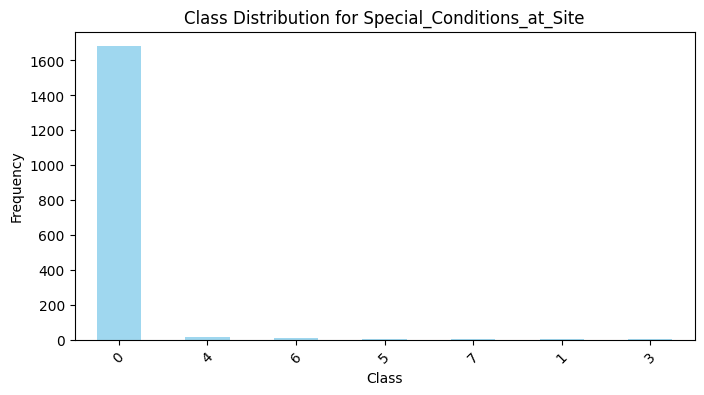

Statistics for Carriageway_Hazards:

Counts:
Carriageway_Hazards
0    1687
7       7
2       5
1       3
6       2
3       1
Name: count, dtype: int64
Proportions (%):
Carriageway_Hazards
0    98.944282
7     0.410557
2     0.293255
1     0.175953
6     0.117302
3     0.058651
Name: proportion, dtype: float64
Mode: 0



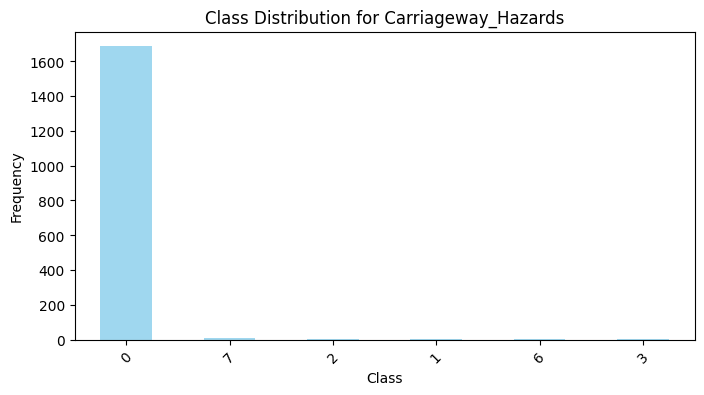

Statistics for Urban_or_Rural_Area:

Counts:
Urban_or_Rural_Area
1    1659
2      46
Name: count, dtype: int64
Proportions (%):
Urban_or_Rural_Area
1    97.302053
2     2.697947
Name: proportion, dtype: float64
Mode: 1



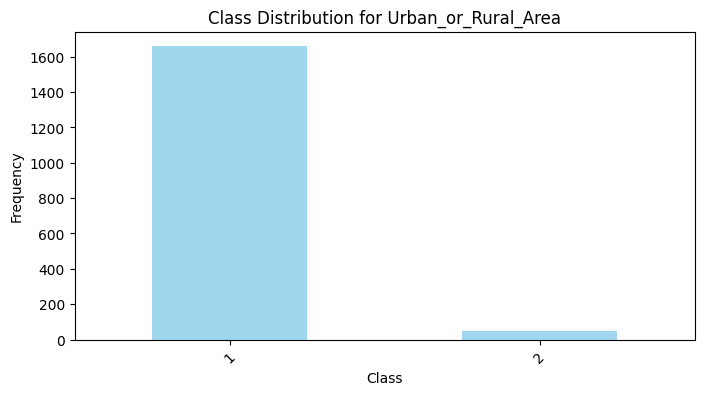

Statistics for Did_Police_Officer_Attend_Scene_of_Accident:

Counts:
Did_Police_Officer_Attend_Scene_of_Accident
1    1397
2     295
3      13
Name: count, dtype: int64
Proportions (%):
Did_Police_Officer_Attend_Scene_of_Accident
1    81.935484
2    17.302053
3     0.762463
Name: proportion, dtype: float64
Mode: 1



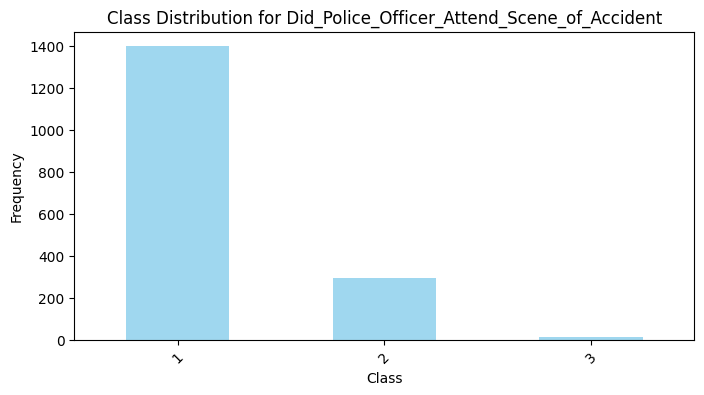

Statistics for LSOA_of_Accident_Location:

Counts:
LSOA_of_Accident_Location
E01002968    195
E01002984     59
E01002948     57
E01003003     50
E01003004     45
            ... 
E01030388      1
E01003445      1
E01002937      1
E01003817      1
E01002923      1
Name: count, Length: 100, dtype: int64
Proportions (%):
LSOA_of_Accident_Location
E01002968    11.436950
E01002984     3.460411
E01002948     3.343109
E01003003     2.932551
E01003004     2.639296
               ...    
E01030388     0.058651
E01003445     0.058651
E01002937     0.058651
E01003817     0.058651
E01002923     0.058651
Name: proportion, Length: 100, dtype: float64
Mode: E01002968



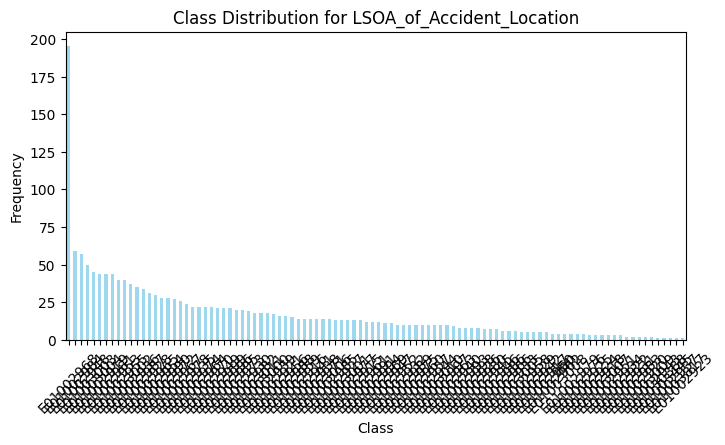

In [ ]:
#Explore basic statistics of each attribute
categorical_cols = [
    'Police_Force', 'Accident_Severity', 'Day_of_Week', 'Local_Authority_District',
    'Local_Authority_Highway', '1st_Road_Class', 'Road_Type', 'Speed_limit',
    'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
    'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
    'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
    'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'
]

for col in categorical_cols:
    print(f"Statistics for {col}:\n")
    
    # Frequency counts and proportions
    counts = my_data_cleaned[col].value_counts()
    proportions = my_data_cleaned[col].value_counts(normalize=True)
    
    # Mode (most frequent value)
    mode = my_data_cleaned[col].mode()[0]
    
    print(f"Counts:\n{counts}")
    print(f"Proportions (%):\n{proportions * 100}")
    print(f"Mode: {mode}\n")
    
    # Visualization: Bar plot for class distributions
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f"Class Distribution for {col}")
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

## Check coursework data

TypeError: Invalid object type at position 0

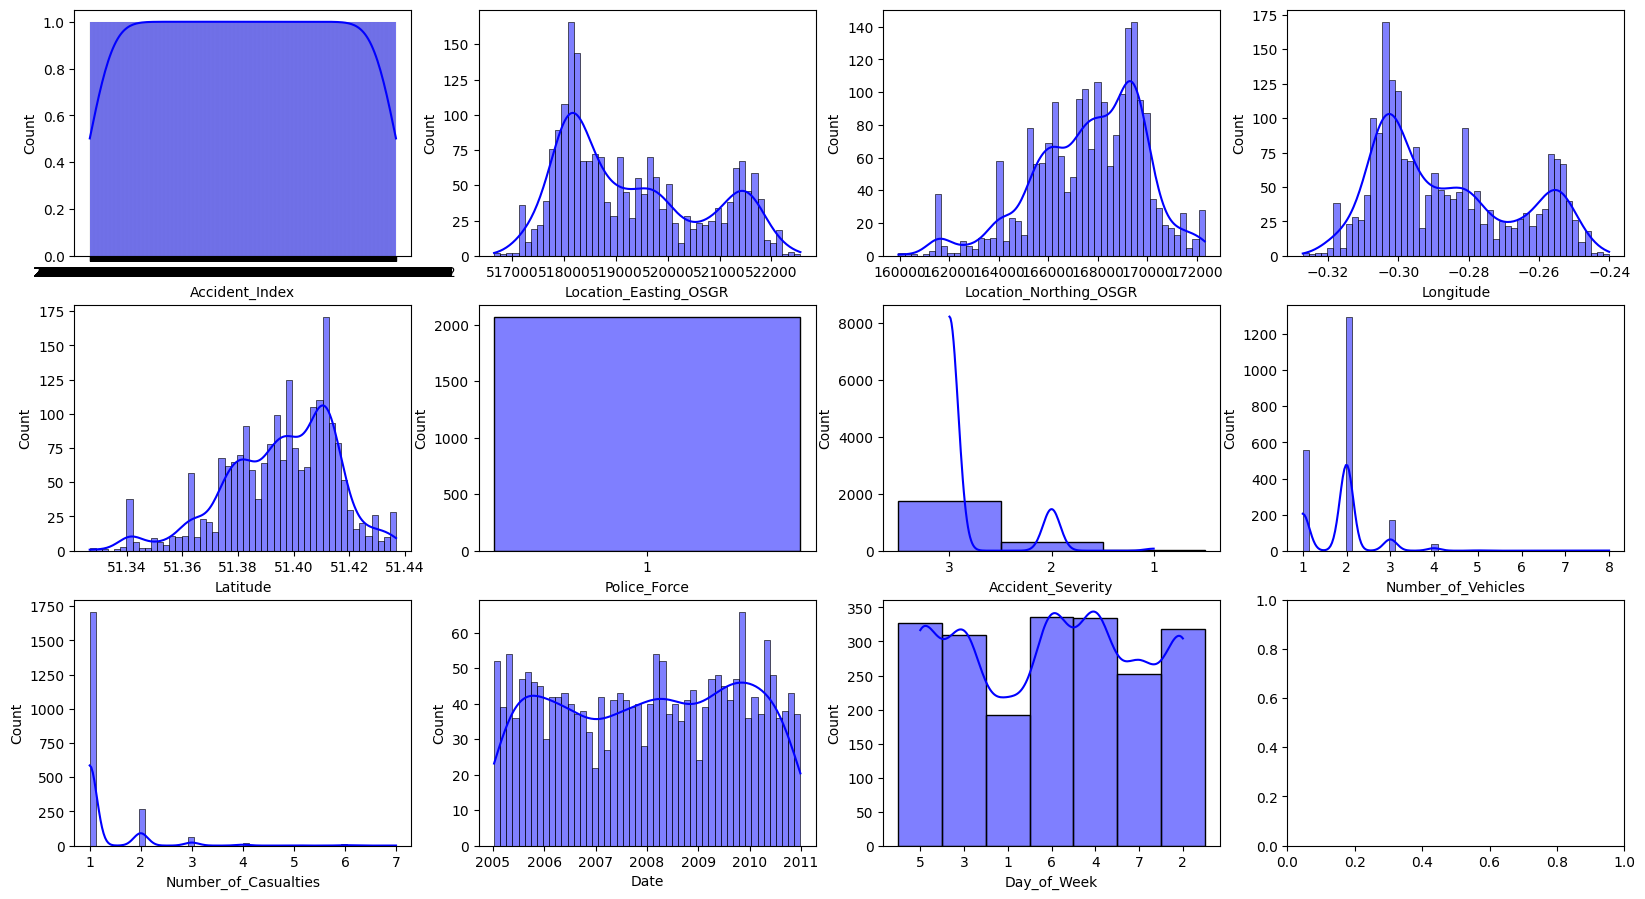

In [ ]:
# Read the dataset

# Create a figure for multiple subplots
fig = plt.figure(figsize=(20, 30))

# Loop through each column in the dataset
for i in range(len(main_df.columns)):
    column = main_df.columns[i]
    sub = fig.add_subplot(8, 4, i + 1)  # Adjust the grid size based on the number of columns
    chart = sns.histplot(data=main_df, x=column, bins=50, color='blue', kde=True)
    # Optional: Set the title for each subplot
    # chart.set_title(column)


Statistics for Longitude:

Range: (np.float64(-0.322592), np.float64(-0.240029))
Mean: -0.28657742873900294
Standard Deviation: 0.019574295133454777
Skewness: 0.5346755208852578
Kurtosis: -0.9840962485637044
Mode: -0.318182



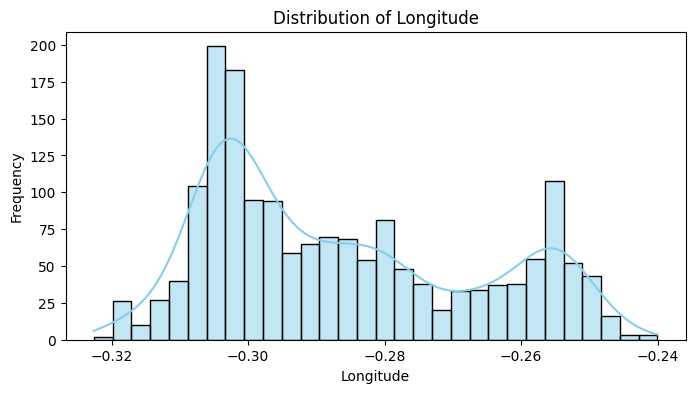

Statistics for Latitude:

Range: (np.float64(51.340366), np.float64(51.436819))
Mean: 51.396396457478005
Standard Deviation: 0.019169678043049053
Skewness: -0.5224307522997643
Kurtosis: 0.10574098794478148
Mode: 51.341169



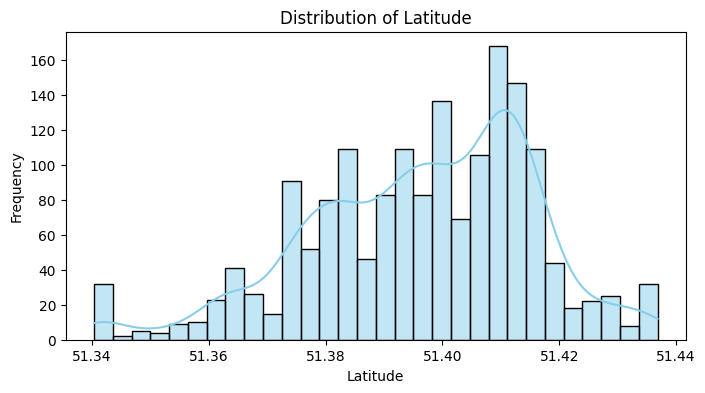

Statistics for Number_of_Vehicles:

Range: (np.int64(1), np.int64(8))
Mean: 1.790615835777126
Standard Deviation: 0.6215278451588202
Skewness: 1.2766063409035726
Kurtosis: 9.268785771091464
Mode: 2



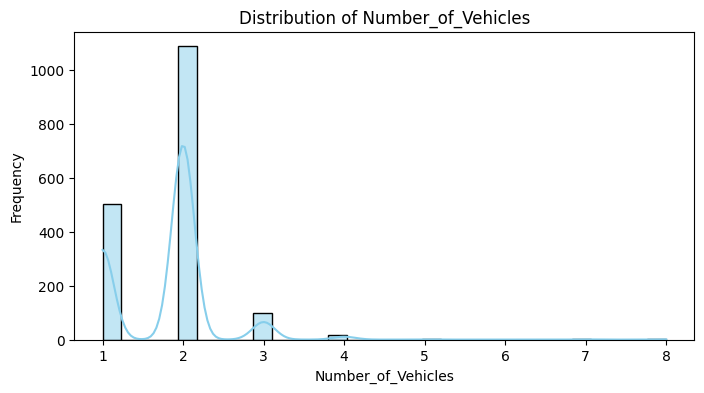

Statistics for Number_of_Casualties:

Range: (np.int64(1), np.int64(1))
Mean: 1.0
Standard Deviation: 0.0
Skewness: nan
Kurtosis: nan
Mode: 1



C:\Users\USER\AppData\Local\Temp\ipykernel_23516\1517211522.py:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(my_data_cleaned[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_23516\1517211522.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(my_data_cleaned[col])


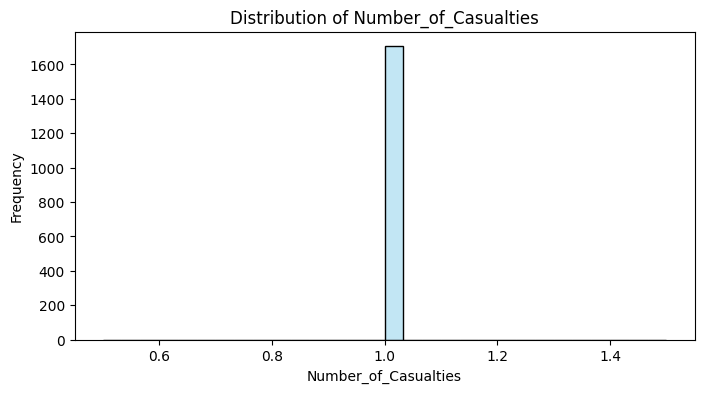

In [ ]:
from scipy.stats import skew, kurtosis

# Select numerical columns from my_data_cleaned
numerical_cols = my_data_cleaned.select_dtypes(include='number').columns

for col in numerical_cols:
    print(f"Statistics for {col}:\n")
    
    # Calculate statistics
    value_range = (my_data_cleaned[col].min(), my_data_cleaned[col].max())
    avg = my_data_cleaned[col].mean()
    std_dev = my_data_cleaned[col].std()
    skewness = skew(my_data_cleaned[col])
    kurt = kurtosis(my_data_cleaned[col])
    mode = my_data_cleaned[col].mode()[0]
    
    print(f"Range: {value_range}")
    print(f"Mean: {avg}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")
    print(f"Mode: {mode}\n")
    
    # Visualization: Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(my_data_cleaned[col], bins=30, color='skyblue', kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

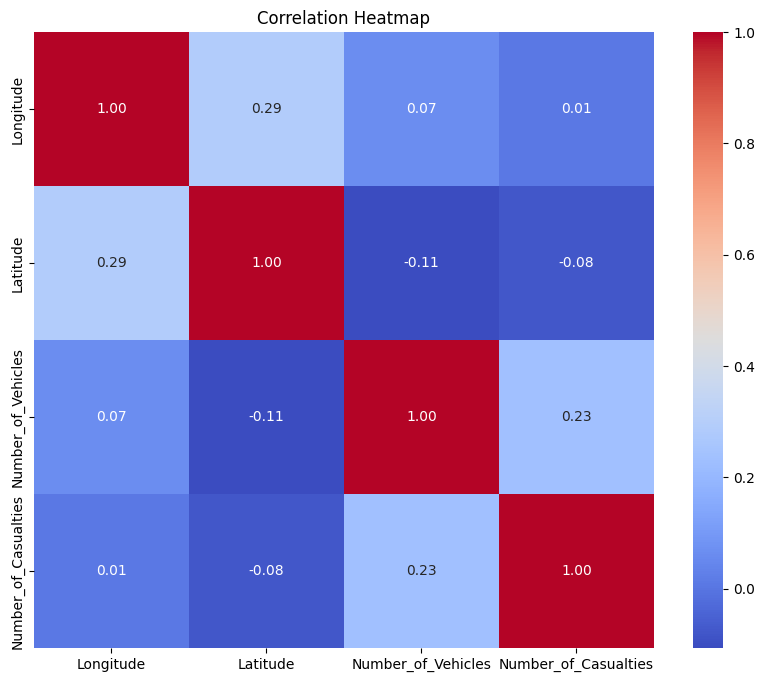

In [ ]:
#Identify correlations between certain attributes
# Assuming `df` is your DataFrame
numerical_columns = processed_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = processed_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Determine which, why and how each attribute should and should not be used in your analysis

# **Business Question 1**  
**Is there a relationship between casualties, road type, speed limit, and lighting conditions?**

### **Relevant Attributes**:
1. **`Number_of_Casualties`**: Target variable to measure the impact.
2. **`Road_Type`**: To identify how road types influence casualties.
3. **`Speed_limit`**: Speed is directly related to accident severity.
4. **`Light_Conditions`**: Poor lighting may correlate with higher casualties.

### **Excluded Columns**:
- Columns like **`Accident_Index`**, **`1st_Road_Number`**, **`Local_Authority_Highway`**, and **`Police_Force`** are not relevant because they don’t influence the relationship between road conditions and casualties.
- **`Longitude`** and **`Latitude`** are excluded because they are not required for this specific analysis.

---

# **Business Question 2**  
**Where are the most frequent accident hotspots geographically?**

### **Relevant Attributes**:
1. **`Longitude`** and **`Latitude`**: Core attributes to map accident locations.
2. **`Number_of_Casualties`**: Helps identify areas with higher impact accidents.

### **Excluded Columns**:
- Columns like **`Road_Type`**, **`Speed_limit`**, and **`Light_Conditions`** are not directly relevant because this question focuses on geographic clustering, not the conditions of accidents.
- **`Accident_Index`** and **`Date`** are excluded as they do not contribute to hotspot detection.

---

# **Business Question 3**  
**How do weather and road surface conditions affect casualties and accident severity?**

### **Relevant Attributes**:
1. **`Weather_Conditions`**: To explore the influence of weather on accidents.
2. **`Road_Surface_Conditions`**: To identify how road conditions affect accidents.
3. **`Number_of_Casualties`**: Target variable for impact analysis.
4. **`Accident_Severity`**: To measure how conditions affect severity.

### **Excluded Columns**:
- Columns like **`Longitude`**, **`Latitude`**, **`Light_Conditions`**, and **`Junction_Detail`** are excluded as they are not directly relevant to the weather and road surface analysis.
- **`Speed_limit`** and **`Road_Type`** are excluded because this question focuses on environmental conditions rather than road-related features.

---

# **Summary of Exclusions**
- **General Exclusions**: Columns like **`Accident_Index`**, **`1st_Road_Number`**, and **`Local_Authority_Highway`** are consistently excluded because they provide no analytical value or are irrelevant to the questions.  
- **Context-Specific Exclusions**: Columns like **`Longitude`** and **`Light_Conditions`** are excluded when the question doesn’t involve geography or lighting.


In [ ]:
# Filter relevant columns based on business questions
relevant_columns = [
    'Number_of_Casualties', 'Road_Type', 'Speed_limit', 'Light_Conditions',
    'Longitude', 'Latitude', 'Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions'
]

# Create a new DataFrame with only relevant columns
filtered_df = processed_df[relevant_columns]

# Display the first few rows of the filtered dataset
print(filtered_df.head())


   Number_of_Casualties Road_Type Speed_limit Light_Conditions  Longitude  \
0                     1         6          50                4  -0.250492   
1                     1         3          50                1  -0.304009   
2                     2         3          30                4  -0.290258   
3                     1         3          50                4  -0.264617   
4                     1         3          30                4  -0.256614   

    Latitude Accident_Severity Weather_Conditions Road_Surface_Conditions  
0  51.414457                 3                  1                       2  
1  51.375047                 3                  1                       2  
2  51.362347                 2                  1                       1  
3  51.390837                 3                  1                       1  
4  51.434962                 2                  1                       1  


In [ ]:
#Divide the dataset into training, validation and test sets
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = processed_df.drop(columns=['Accident_Severity'])  # Features
y = processed_df['Accident_Severity']  # Target (example target for predictive modeling)

# Step 1: Split into Training + Validation/Test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Split the remaining 30% into Validation and Test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the subsets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (1449, 29), (1449,)
Validation set: (310, 29), (310,)
Test set: (311, 29), (311,)


## Modeling

### Descriptive for question 1

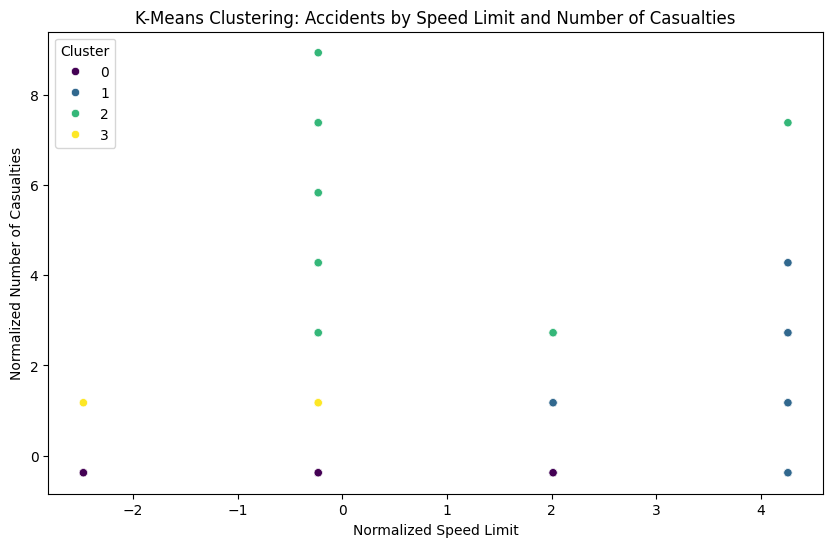

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Filter only relevant columns for clustering
clustering_data = filtered_df[['Number_of_Casualties', 'Speed_limit', 'Road_Type', 'Light_Conditions']].copy()

# Handle missing values (if any)
clustering_data.dropna(inplace=True)

# Normalize numerical columns for clustering
scaler = StandardScaler()
clustering_data[['Number_of_Casualties', 'Speed_limit']] = scaler.fit_transform(clustering_data[['Number_of_Casualties', 'Speed_limit']])

# Convert categorical variables to numerical using one-hot encoding
clustering_data = pd.get_dummies(clustering_data, columns=['Road_Type', 'Light_Conditions'], drop_first=True)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Number of clusters can be adjusted
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)

# Visualize clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Speed_limit', y='Number_of_Casualties', hue='Cluster', data=clustering_data, palette='viridis'
)
plt.title('K-Means Clustering: Accidents by Speed Limit and Number of Casualties')
plt.xlabel('Normalized Speed Limit')
plt.ylabel('Normalized Number of Casualties')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Merge clustering data back with original filtered_df to analyze clusters
clustering_data['Cluster'] = kmeans.labels_
clustered_summary = clustering_data.groupby('Cluster').mean()

print("Cluster Properties:")
print(clustered_summary)


Cluster Properties:
         Number_of_Casualties  Speed_limit  Road_Type_2  Road_Type_3  \
Cluster                                                                
0                   -0.381333    -0.241998     0.033375     0.119283   
1                    0.123670     3.826976     0.000000     0.925000   
2                    3.676974    -0.098904     0.023529     0.211765   
3                    1.172523    -0.239988     0.032389     0.149798   

         Road_Type_6  Road_Type_7  Road_Type_9  Light_Conditions_4  \
Cluster                                                              
0           0.764524     0.016069     0.000618            0.214462   
1           0.025000     0.033333     0.000000            0.308333   
2           0.658824     0.047059     0.000000            0.376471   
3           0.765182     0.012146     0.000000            0.327935   

         Light_Conditions_5  Light_Conditions_6  Light_Conditions_7  
Cluster                                                 

In [ ]:
correlation_matrix = filtered_df[['Number_of_Casualties', 'Speed_limit']].corr()
print(correlation_matrix)

                      Number_of_Casualties  Speed_limit
Number_of_Casualties              1.000000     0.061866
Speed_limit                       0.061866     1.000000


      Number_of_Casualties Road_Type Speed_limit Light_Conditions  Longitude  \
0                        1         6          50                4  -0.250492   
1                        1         3          50                1  -0.304009   
2                        2         3          30                4  -0.290258   
3                        1         3          50                4  -0.264617   
4                        1         3          30                4  -0.256614   
...                    ...       ...         ...              ...        ...   
2065                     1         3          30                1  -0.316802   
2066                     1         6          30                4  -0.306563   
2067                     1         6          30                1  -0.285126   
2068                     1         6          30                1  -0.285664   
2069                     1         6          30                1  -0.249475   

       Latitude Accident_Severity Weath

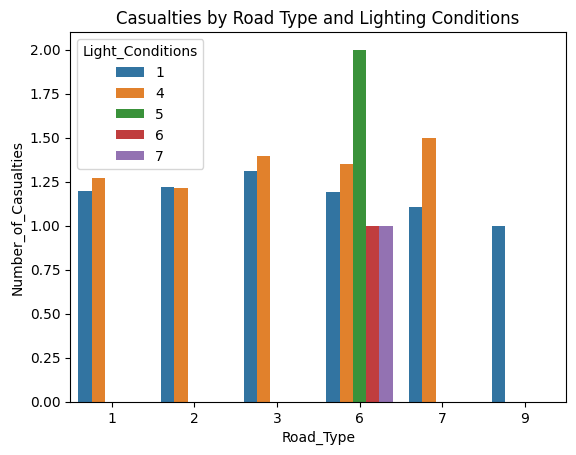

In [ ]:

print(filtered_df)
grouped_data = filtered_df.groupby(['Road_Type', 'Light_Conditions'])['Number_of_Casualties'].mean().reset_index()

sns.barplot(
    x='Road_Type', y='Number_of_Casualties', hue='Light_Conditions', data=grouped_data
)
plt.title('Casualties by Road Type and Lighting Conditions')
plt.show()


### Question 2

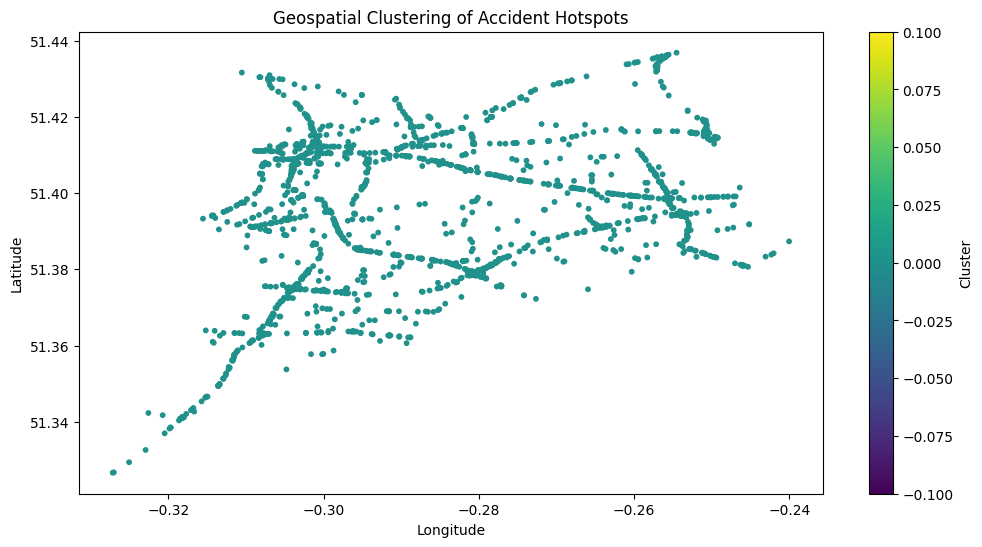

In [ ]:
from sklearn.cluster import DBSCAN
import folium
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
# Filter relevant columns
geo_data = filtered_df[['Longitude', 'Latitude']].dropna()

# Convert to numpy array for clustering
coordinates = geo_data.to_numpy()

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.01, min_samples=10)  # Adjust eps and min_samples based on your dataset
geo_data['Cluster'] = dbscan.fit_predict(coordinates)

# Visualize clusters on a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(
    geo_data['Longitude'], geo_data['Latitude'], c=geo_data['Cluster'], cmap='viridis', s=10
)
plt.colorbar(label='Cluster')
plt.title('Geospatial Clustering of Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Create an interactive map using Folium
map_center = [geo_data['Latitude'].mean(), geo_data['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add clusters to the map
for idx, row in geo_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='blue' if row['Cluster'] != -1 else 'red',  # Noise points in red
        fill=True,
        fill_color='blue' if row['Cluster'] != -1 else 'red',
        fill_opacity=0.7,
    ).add_to(m)

# Display the map directly in the notebook
from folium import Map
from IPython.display import HTML
display(HTML(m._repr_html_()))

### Question 3

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       1.00      0.02      0.03        61
           3       0.85      1.00      0.92       349

    accuracy                           0.85       414
   macro avg       0.62      0.34      0.32       414
weighted avg       0.86      0.85      0.78       414



c:\Users\USER\CodeSpace\school\data_mining\accidents\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\CodeSpace\school\data_mining\accidents\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\CodeSpace\school\data_mining\accidents\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

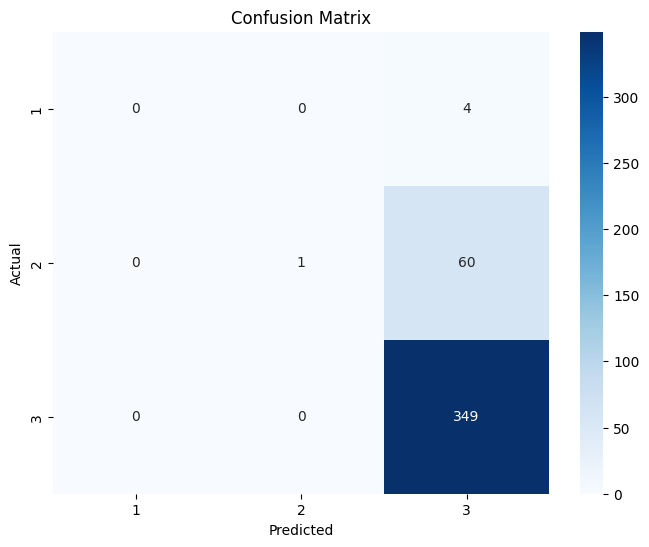

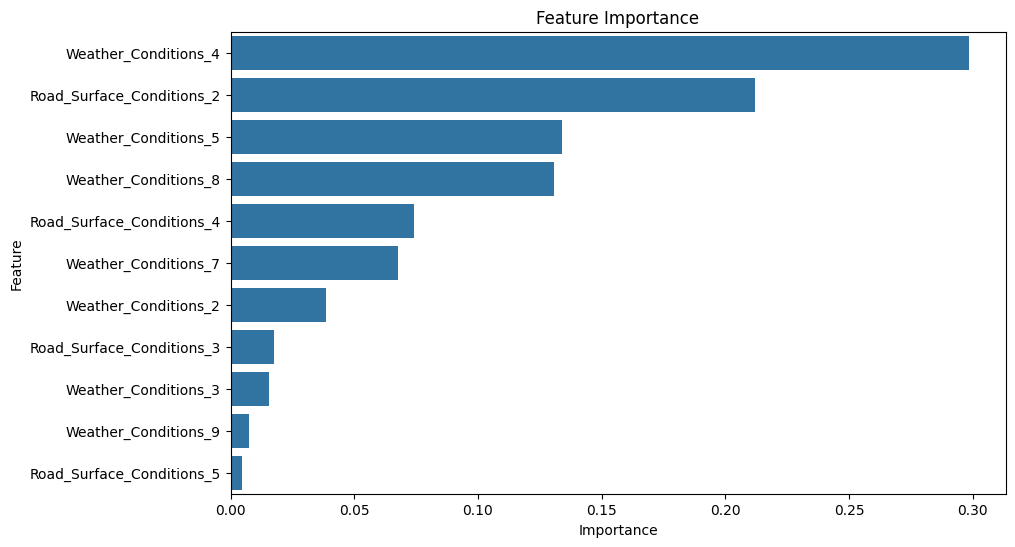

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the dataset
predictive_data = filtered_df[['Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions']].dropna()

# Convert categorical variables to numeric via one-hot encoding
predictive_data_encoded = pd.get_dummies(predictive_data, columns=['Weather_Conditions', 'Road_Surface_Conditions'], drop_first=True)

# Split the data into features (X) and target (y)
X = predictive_data_encoded.drop(columns='Accident_Severity')
y = predictive_data_encoded['Accident_Severity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()
